In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('/Users/baptistecarbillet/Documents/MachineLearning1/winequality-white.csv',sep=';')
df['y'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)
df = df.drop('quality',axis=1)

X,y = np.array(df.drop('y',axis=1)),np.array(df['y'])

from sklearn.model_selection import train_test_split

random_state = 75 #Paris

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=random_state)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

 

((3918, 11), (980, 11), (3918,), (980,))

In [17]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada = AdaBoostClassifier(estimator= DecisionTreeClassifier(max_depth= 4) ,n_estimators=100,random_state=random_state)

In [18]:
from sklearn.model_selection import KFold, cross_validate
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True,random_state=random_state)

model = ada
scoring=('f1')

cv_results = cross_validate(model, X_train, y_train, cv=kf, scoring=scoring, return_train_score=True,return_estimator=True)

for i in range(n_splits):
    print('Fold',i+1)
    print('Train accuracy:',cv_results['train_score'][i])
    print('Test accuracy:',cv_results['test_score'][i])
   


Fold 1
Train accuracy: 1.0
Test accuracy: 0.6570605187319885
Fold 2
Train accuracy: 1.0
Test accuracy: 0.6495176848874599
Fold 3
Train accuracy: 1.0
Test accuracy: 0.6105919003115264
Fold 4
Train accuracy: 1.0
Test accuracy: 0.6644518272425248
Fold 5
Train accuracy: 1.0
Test accuracy: 0.6242424242424242


### Test Depth for score

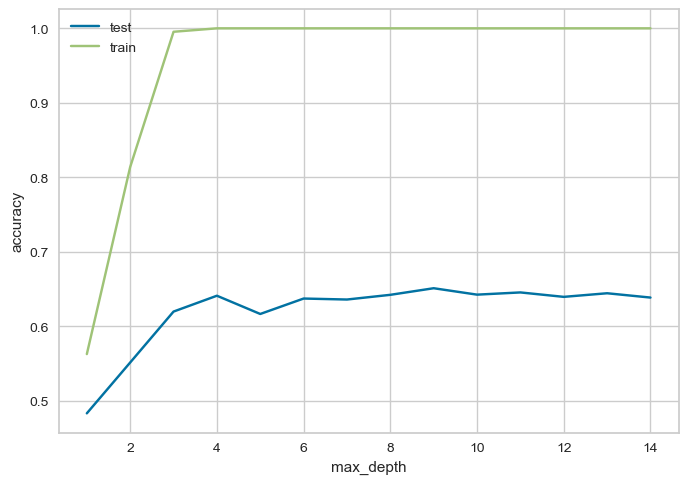

In [19]:
test_score = []
train_score = []

for d in range(1,15):
    model = AdaBoostClassifier(estimator= DecisionTreeClassifier(max_depth= d) ,n_estimators=100,random_state=random_state)
    cv_results = cross_validate(model, X_train, y_train, cv=kf, scoring=scoring, return_train_score=True,return_estimator=True)
    test_score.append(np.mean(cv_results['test_score']))
    train_score.append(np.mean(cv_results['train_score']))
    
plt.plot(range(1,15),test_score,label='test')
plt.plot(range(1,15),train_score,label='train')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

In [20]:
# print best max_depth

max_depth = np.argmax(test_score)+1

print('Best max_depth:',max_depth)

Best max_depth: 9


### Test number of estimators for score


In [21]:
# test it for max depth = 2 and max depth = 4

X_train_lc,X_val_lc,y_train_lc,y_val_lc = train_test_split(X_train,y_train,test_size=0.2,random_state=random_state)

model2 = AdaBoostClassifier(estimator= DecisionTreeClassifier(max_depth=2,splitter='best') ,n_estimators=300,random_state=random_state)
model4 = AdaBoostClassifier(estimator= DecisionTreeClassifier(max_depth=4,splitter='best') ,n_estimators=300,random_state=random_state)
model2.fit(X_train_lc,y_train_lc)
model4.fit(X_train_lc,y_train_lc)

train_acc_lc2 = []
val_acc_lc2 = []

train_acc_lc4 = []
val_acc_lc4 = []
#import f1
from sklearn.metrics import f1_score
###Iterate over the staged prediction, for each prediction get the accuracy
for y_pred in model2.staged_predict(X_train_lc):
    train_acc_lc2.append(f1_score(y_train_lc,y_pred))
    
for y_pred in model2.staged_predict(X_val_lc):
    val_acc_lc2.append(f1_score(y_val_lc,y_pred))
    
for y_pred in model4.staged_predict(X_train_lc):
    train_acc_lc4.append(f1_score(y_train_lc,y_pred))
    
for y_pred in model4.staged_predict(X_val_lc):
    val_acc_lc4.append(f1_score(y_val_lc,y_pred))
    



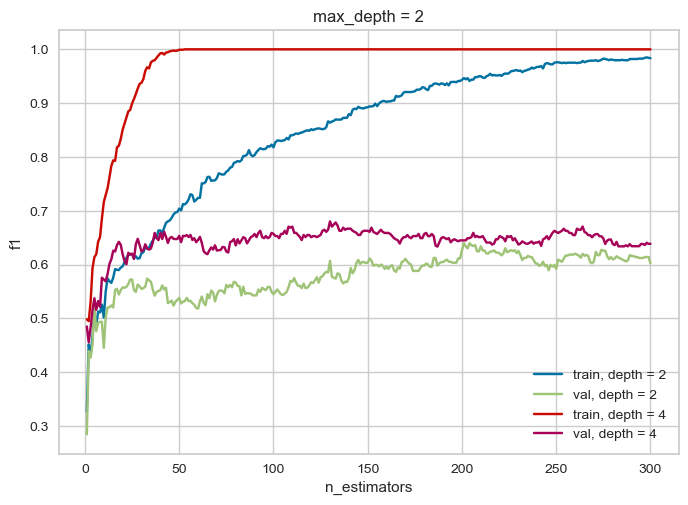

In [22]:
#plot
plt.plot(range(1,301),train_acc_lc2,label='train, depth = 2')
plt.plot(range(1,301),val_acc_lc2,label='val, depth = 2')
plt.xlabel('n_estimators')
plt.ylabel('f1')

plt.title('max_depth = 2')

plt.plot(range(1,301),train_acc_lc4,label='train, depth = 4')
plt.plot(range(1,301),val_acc_lc4,label='val, depth = 4')

plt.legend()

plt.show()


In [23]:
#print best val accuracy

print('Best val accuracy for max_depth = 2:',np.max(val_acc_lc2))
print('Best val accuracy for max_depth = 4:',np.max(val_acc_lc4))

Best val accuracy for max_depth = 2: 0.6397694524495677
Best val accuracy for max_depth = 4: 0.6802325581395349


# GridSearchCV

In [24]:
df = pd.read_csv('/Users/baptistecarbillet/Documents/MachineLearning1/winequality-white.csv',sep=';')
df['y'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)
df = df.drop('quality',axis=1)

X,y = np.array(df.drop('y',axis=1)),np.array(df['y'])

from sklearn.model_selection import train_test_split

random_state = 75 #Paris

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=random_state)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

 

((3918, 11), (980, 11), (3918,), (980,))

In [25]:
from sklearn.model_selection import GridSearchCV
boosing_param = {'n_estimators':[50,100,200,300,400,500,1000,3000],
                'base_estimator':[DecisionTreeClassifier(max_depth=1,splitter='best'),DecisionTreeClassifier(max_depth=1,splitter='random'),DecisionTreeClassifier(max_depth=2,splitter='random'), DecisionTreeClassifier(max_depth=3,splitter='best'),DecisionTreeClassifier(max_depth=3,splitter='random'),DecisionTreeClassifier(max_depth=4,splitter='best'),DecisionTreeClassifier(max_depth=4,splitter='random')],
                'learning_rate':np.logspace(-3,0,4)}

grid = GridSearchCV(AdaBoostClassifier(random_state=random_state),param_grid=boosing_param,cv=4,scoring=scoring,return_train_score=True,n_jobs=-1,verbose=10)


grid.fit(X_train,y_train)

Fitting 4 folds for each of 224 candidates, totalling 896 fits
[CV 1/4; 1/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=50


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 1/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=50
[CV 2/4; 2/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=100
[CV 3/4; 2/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=100
[CV 1/4; 1/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=50;, score=(train=0.000, test=0.000) total time=   0.4s
[CV 4/4; 1/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=50
[CV 1/4; 2/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=100
[CV 3/4; 1/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=50
[CV 3/4; 3/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=200


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `e

[CV 1/4; 3/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=200
[CV 4/4; 2/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=100
[CV 2/4; 3/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=200
[CV 2/4; 1/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=50;, score=(train=0.000, test=0.000) total time=   0.3s
[CV 4/4; 3/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=200


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 1/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=50;, score=(train=0.000, test=0.000) total time=   0.3s
[CV 3/4; 1/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=50;, score=(train=0.000, test=0.000) total time=   0.3s
[CV 1/4; 4/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=300
[CV 2/4; 4/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=300


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 2/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=100;, score=(train=0.000, test=0.000) total time=   0.5s
[CV 2/4; 2/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=100;, score=(train=0.000, test=0.000) total time=   0.6s
[CV 3/4; 4/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=300
[CV 4/4; 4/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=300
[CV 4/4; 2/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=100;, score=(train=0.000, test=0.000) total time=   0.5s
[CV 1/4; 2/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=100;, score=(train=0.000, test=0.000) total time=   0.6s
[CV 1/4; 5/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=400
[CV 2/4; 5/2

/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 3/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=200;, score=(train=0.000, test=0.000) total time=   1.1s
[CV 3/4; 5/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=400
[CV 3/4; 3/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=200;, score=(train=0.000, test=0.000) total time=   1.2s
[CV 4/4; 5/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=400
[CV 2/4; 3/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=200;, score=(train=0.000, test=0.000) total time=   1.1s
[CV 1/4; 6/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=500
[CV 4/4; 3/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=200;, score=(train=0.000, test=0.000) total time=   1.0s
[CV 2/4; 6/2

/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 4/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=300;, score=(train=0.000, test=0.000) total time=   1.6s
[CV 3/4; 6/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=500
[CV 2/4; 4/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=300;, score=(train=0.000, test=0.000) total time=   1.7s
[CV 4/4; 6/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 4/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=300;, score=(train=0.000, test=0.000) total time=   1.5s
[CV 1/4; 7/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=1000
[CV 3/4; 4/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=300;, score=(train=0.000, test=0.000) total time=   1.6s
[CV 2/4; 7/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 5/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=400;, score=(train=0.000, test=0.000) total time=   2.2s
[CV 3/4; 7/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 5/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=400;, score=(train=0.000, test=0.000) total time=   2.3s
[CV 4/4; 7/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=1000
[CV 3/4; 5/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=400;, score=(train=0.000, test=0.000) total time=   2.2s
[CV 1/4; 8/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=3000
[CV 4/4; 5/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=400;, score=(train=0.000, test=0.000) total time=   2.2s
[CV 2/4; 8/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 6/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=500;, score=(train=0.000, test=0.000) total time=   2.8s
[CV 3/4; 8/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=3000
[CV 2/4; 6/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=500;, score=(train=0.000, test=0.000) total time=   2.9s
[CV 4/4; 8/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 6/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=500;, score=(train=0.000, test=0.000) total time=   2.8s
[CV 1/4; 9/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=50
[CV 4/4; 6/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=500;, score=(train=0.000, test=0.000) total time=   2.7s
[CV 2/4; 9/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=50


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 9/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=50;, score=(train=0.000, test=0.000) total time=   0.3s
[CV 3/4; 9/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=50
[CV 2/4; 9/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=50;, score=(train=0.000, test=0.000) total time=   0.3s
[CV 4/4; 9/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=50


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 9/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=50;, score=(train=0.000, test=0.000) total time=   0.3s
[CV 1/4; 10/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=100
[CV 4/4; 9/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=50;, score=(train=0.000, test=0.000) total time=   0.2s
[CV 2/4; 10/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=100


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 10/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=100;, score=(train=0.000, test=0.000) total time=   0.5s
[CV 3/4; 10/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=100
[CV 2/4; 10/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=100;, score=(train=0.000, test=0.000) total time=   0.6s
[CV 4/4; 10/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=100


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 10/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=100;, score=(train=0.000, test=0.000) total time=   0.6s
[CV 1/4; 11/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=200
[CV 4/4; 10/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=100;, score=(train=0.000, test=0.000) total time=   0.6s
[CV 2/4; 11/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=200


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 11/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=200;, score=(train=0.000, test=0.000) total time=   1.1s
[CV 3/4; 11/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=200
[CV 2/4; 11/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=200;, score=(train=0.000, test=0.000) total time=   1.1s
[CV 4/4; 11/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=200


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 7/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=1000;, score=(train=0.000, test=0.000) total time=   5.5s
[CV 1/4; 12/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=300
[CV 1/4; 7/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=1000;, score=(train=0.000, test=0.000) total time=   5.6s
[CV 2/4; 12/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=300


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 7/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=1000;, score=(train=0.000, test=0.000) total time=   5.3s
[CV 3/4; 12/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=300


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 7/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=1000;, score=(train=0.000, test=0.000) total time=   5.5s
[CV 4/4; 12/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=300
[CV 4/4; 11/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=200;, score=(train=0.016, test=0.028) total time=   1.0s
[CV 3/4; 11/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=200;, score=(train=0.000, test=0.000) total time=   1.1s
[CV 1/4; 13/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=400
[CV 2/4; 13/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=400


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 12/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=300;, score=(train=0.022, test=0.019) total time=   1.6s
[CV 3/4; 13/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=400
[CV 2/4; 12/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=300;, score=(train=0.095, test=0.080) total time=   1.7s
[CV 4/4; 13/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=400


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 12/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=300;, score=(train=0.016, test=0.019) total time=   1.6s
[CV 1/4; 14/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 12/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=300;, score=(train=0.131, test=0.071) total time=   1.6s
[CV 2/4; 14/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 13/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=400;, score=(train=0.113, test=0.087) total time=   2.1s
[CV 3/4; 14/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=500
[CV 1/4; 13/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=400;, score=(train=0.063, test=0.122) total time=   2.2s
[CV 4/4; 14/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 13/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=400;, score=(train=0.092, test=0.071) total time=   2.2s
[CV 1/4; 15/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=1000
[CV 4/4; 13/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=400;, score=(train=0.215, test=0.136) total time=   2.0s
[CV 2/4; 15/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 14/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=500;, score=(train=0.193, test=0.250) total time=   2.7s
[CV 3/4; 15/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 14/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=500;, score=(train=0.162, test=0.140) total time=   2.6s
[CV 4/4; 15/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 14/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=500;, score=(train=0.116, test=0.080) total time=   2.7s
[CV 1/4; 16/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=3000
[CV 4/4; 14/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=500;, score=(train=0.228, test=0.156) total time=   2.7s
[CV 2/4; 16/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 15/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=1000;, score=(train=0.311, test=0.346) total time=   5.3s
[CV 3/4; 16/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 15/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=1000;, score=(train=0.350, test=0.316) total time=   5.5s
[CV 4/4; 16/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 15/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=1000;, score=(train=0.311, test=0.235) total time=   5.3s
[CV 1/4; 17/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=50


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 17/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=50;, score=(train=0.230, test=0.291) total time=   0.3s
[CV 2/4; 17/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=50


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 17/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=50;, score=(train=0.210, test=0.176) total time=   0.3s
[CV 3/4; 17/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=50
[CV 4/4; 15/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=1000;, score=(train=0.346, test=0.317) total time=   5.6s
[CV 4/4; 17/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=50


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 17/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=50;, score=(train=0.118, test=0.105) total time=   0.3s
[CV 1/4; 18/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=100
[CV 4/4; 17/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=50;, score=(train=0.244, test=0.175) total time=   0.3s
[CV 2/4; 18/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=100


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 18/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=100;, score=(train=0.311, test=0.348) total time=   0.5s
[CV 3/4; 18/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=100
[CV 2/4; 18/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=100;, score=(train=0.356, test=0.325) total time=   0.5s
[CV 4/4; 18/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=100


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 8/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=3000;, score=(train=0.022, test=0.019) total time=  16.2s
[CV 1/4; 19/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=200
[CV 2/4; 8/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=3000;, score=(train=0.095, test=0.080) total time=  16.3s
[CV 2/4; 19/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=200
[CV 3/4; 18/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=100;, score=(train=0.345, test=0.272) total time=   0.6s
[CV 3/4; 19/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=200
[CV 4/4; 18/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=100;, score=(train=0.364, test=0.357) total time=   0.6s
[CV 4/4; 19/224

/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 8/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=3000;, score=(train=0.016, test=0.019) total time=  16.0s
[CV 1/4; 20/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=300


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 8/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=3000;, score=(train=0.131, test=0.071) total time=  16.4s
[CV 2/4; 20/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=300


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 19/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=200;, score=(train=0.398, test=0.414) total time=   1.1s
[CV 3/4; 20/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=300
[CV 3/4; 19/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=200;, score=(train=0.411, test=0.329) total time=   1.1s
[CV 4/4; 20/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=300
[CV 2/4; 19/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=200;, score=(train=0.444, test=0.404) total time=   1.1s
[CV 1/4; 21/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=400
[CV 4/4; 19/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=200;, score=(train=0.433, test=0.379) total time=   1.1s
[CV 2/4; 21/224] ST

/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 20/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=300;, score=(train=0.437, test=0.444) total time=   1.6s
[CV 3/4; 21/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=400


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 20/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=300;, score=(train=0.462, test=0.407) total time=   1.6s
[CV 4/4; 21/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=400


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 20/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=300;, score=(train=0.419, test=0.359) total time=   1.6s
[CV 4/4; 20/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=300;, score=(train=0.496, test=0.423) total time=   1.6s
[CV 1/4; 22/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=500
[CV 2/4; 22/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 21/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=400;, score=(train=0.453, test=0.456) total time=   2.1s
[CV 3/4; 22/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=500
[CV 2/4; 21/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=400;, score=(train=0.498, test=0.456) total time=   2.2s
[CV 4/4; 22/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 21/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=400;, score=(train=0.444, test=0.381) total time=   2.1s
[CV 1/4; 23/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 21/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=400;, score=(train=0.500, test=0.438) total time=   2.1s
[CV 2/4; 23/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 22/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=500;, score=(train=0.468, test=0.468) total time=   2.7s
[CV 3/4; 23/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=1000
[CV 2/4; 22/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=500;, score=(train=0.501, test=0.452) total time=   2.7s
[CV 4/4; 23/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 22/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=500;, score=(train=0.479, test=0.399) total time=   2.7s
[CV 1/4; 24/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=3000
[CV 4/4; 22/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=500;, score=(train=0.526, test=0.455) total time=   2.8s
[CV 2/4; 24/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 23/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=1000;, score=(train=0.538, test=0.501) total time=   5.4s
[CV 3/4; 24/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 16/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=3000;, score=(train=0.433, test=0.448) total time=  16.2s
[CV 4/4; 24/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=3000
[CV 2/4; 23/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=1000;, score=(train=0.543, test=0.490) total time=   5.5s
[CV 1/4; 25/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=50
[CV 2/4; 16/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=3000;, score=(train=0.466, test=0.399) total time=  16.3s
[CV 2/4; 25/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=50


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 25/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=50;, score=(train=0.521, test=0.473) total time=   0.3s
[CV 3/4; 25/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=50
[CV 2/4; 25/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=50;, score=(train=0.525, test=0.482) total time=   0.3s
[CV 4/4; 25/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=50


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 25/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=50;, score=(train=0.528, test=0.489) total time=   0.3s
[CV 1/4; 26/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=100
[CV 4/4; 25/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=50;, score=(train=0.569, test=0.484) total time=   0.3s
[CV 2/4; 26/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=100
[CV 3/4; 23/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=1000;, score=(train=0.537, test=0.453) total time=   5.4s
[CV 3/4; 26/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=100


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 23/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=1000;, score=(train=0.584, test=0.456) total time=   5.4s
[CV 4/4; 26/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=100
[CV 1/4; 26/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=100;, score=(train=0.561, test=0.508) total time=   0.5s
[CV 1/4; 27/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=200


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 26/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=100;, score=(train=0.553, test=0.456) total time=   0.5s
[CV 2/4; 27/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=200
[CV 3/4; 26/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=100;, score=(train=0.571, test=0.489) total time=   0.5s
[CV 3/4; 27/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=200


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 26/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=100;, score=(train=0.598, test=0.501) total time=   0.6s
[CV 4/4; 27/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=200


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 27/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=200;, score=(train=0.597, test=0.515) total time=   1.1s
[CV 1/4; 28/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=300
[CV 2/4; 27/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=200;, score=(train=0.613, test=0.474) total time=   1.1s
[CV 2/4; 28/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=300
[CV 3/4; 27/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=200;, score=(train=0.608, test=0.485) total time=   1.1s
[CV 3/4; 28/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=300


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 27/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=200;, score=(train=0.639, test=0.500) total time=   1.1s
[CV 4/4; 28/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=300


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 16/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=3000;, score=(train=0.415, test=0.348) total time=  16.4s
[CV 1/4; 29/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=400


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 16/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=3000;, score=(train=0.486, test=0.411) total time=  16.4s
[CV 1/4; 28/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=300;, score=(train=0.631, test=0.552) total time=   1.6s
[CV 3/4; 28/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=300;, score=(train=0.632, test=0.523) total time=   1.5s
[CV 2/4; 29/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=400
[CV 3/4; 29/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=400
[CV 4/4; 29/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=400
[CV 2/4; 28/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=300;, score=(train=0.656, test=0.472) total time=   1.5s
[CV 1/4; 30/224] 

/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 28/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=300;, score=(train=0.650, test=0.491) total time=   1.6s
[CV 2/4; 30/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 29/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=400;, score=(train=0.657, test=0.543) total time=   2.2s
[CV 3/4; 30/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 29/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=400;, score=(train=0.641, test=0.507) total time=   2.1s
[CV 4/4; 30/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=500
[CV 4/4; 29/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=400;, score=(train=0.661, test=0.496) total time=   2.1s
[CV 1/4; 31/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=1000
[CV 2/4; 29/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=400;, score=(train=0.679, test=0.509) total time=   2.2s
[CV 2/4; 31/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 30/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=500;, score=(train=0.678, test=0.539) total time=   2.7s
[CV 3/4; 31/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 30/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=500;, score=(train=0.688, test=0.483) total time=   2.7s
[CV 4/4; 31/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 30/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=500;, score=(train=0.660, test=0.499) total time=   2.7s
[CV 1/4; 32/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=3000
[CV 4/4; 30/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=500;, score=(train=0.675, test=0.515) total time=   2.6s
[CV 2/4; 32/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 31/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=1000;, score=(train=0.718, test=0.543) total time=   5.5s
[CV 3/4; 32/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=3000
[CV 2/4; 31/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=1000;, score=(train=0.740, test=0.499) total time=   5.5s
[CV 4/4; 32/224] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 31/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=1000;, score=(train=0.720, test=0.530) total time=   5.3s
[CV 1/4; 33/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.001, n_estimators=50


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 33/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.001, n_estimators=50;, score=(train=0.000, test=0.000) total time=   0.1s
[CV 2/4; 33/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.001, n_estimators=50
[CV 2/4; 33/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.001, n_estimators=50;, score=(train=0.000, test=0.000) total time=   0.1s
[CV 3/4; 33/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.001, n_estimators=50
[CV 2/4; 24/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=3000;, score=(train=0.631, test=0.505) total time=  16.1s


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `e

[CV 4/4; 33/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.001, n_estimators=50
[CV 1/4; 24/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=3000;, score=(train=0.611, test=0.539) total time=  16.2s
[CV 1/4; 34/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.001, n_estimators=100
[CV 3/4; 33/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.001, n_estimators=50;, score=(train=0.000, test=0.000) total time=   0.1s
[CV 2/4; 34/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.001, n_estimators=100
[CV 4/4; 31/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=1000;, score=(train=0.722, test=0.530) total time=   5.5s
[CV 3/4; 34/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), lea

/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 34/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.001, n_estimators=100;, score=(train=0.000, test=0.000) total time=   0.2s
[CV 1/4; 35/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.001, n_estimators=200
[CV 2/4; 34/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.001, n_estimators=100;, score=(train=0.009, test=0.000) total time=   0.3s
[CV 2/4; 35/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.001, n_estimators=200
[CV 4/4; 34/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.001, n_estimators=100;, score=(train=0.000, test=0.000) total time=   0.2s
[CV 3/4; 35/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.001, n_estimators=200
[CV 3/4; 34/224] END base_estimator=DecisionTreeClassif

/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 35/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.001, n_estimators=200
[CV 2/4; 35/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.001, n_estimators=200;, score=(train=0.013, test=0.000) total time=   0.6s
[CV 1/4; 36/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.001, n_estimators=300
[CV 1/4; 35/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.001, n_estimators=200;, score=(train=0.000, test=0.000) total time=   0.7s
[CV 2/4; 36/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.001, n_estimators=300
[CV 3/4; 35/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.001, n_estimators=200;, score=(train=0.000, test=0.000) total time=   0.6s
[CV 4/4; 35/224] END base_estimator=DecisionTreeClassif

/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 36/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.001, n_estimators=300
[CV 1/4; 36/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.001, n_estimators=300;, score=(train=0.000, test=0.000) total time=   0.8s
[CV 1/4; 37/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.001, n_estimators=400
[CV 2/4; 36/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.001, n_estimators=300;, score=(train=0.013, test=0.000) total time=   0.8s
[CV 2/4; 37/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.001, n_estimators=400
[CV 4/4; 36/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.001, n_estimators=300;, score=(train=0.000, test=0.000) total time=   0.7s
[CV 3/4; 36/224] END base_estimator=DecisionTreeClassif

/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 37/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.001, n_estimators=400;, score=(train=0.013, test=0.000) total time=   0.9s
[CV 1/4; 38/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.001, n_estimators=500
[CV 1/4; 37/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.001, n_estimators=400;, score=(train=0.000, test=0.000) total time=   1.0s
[CV 2/4; 38/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.001, n_estimators=500
[CV 4/4; 37/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.001, n_estimators=400;, score=(train=0.000, test=0.000) total time=   1.0s
[CV 3/4; 38/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.001, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 37/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.001, n_estimators=400;, score=(train=0.000, test=0.000) total time=   1.1s
[CV 4/4; 38/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.001, n_estimators=500
[CV 3/4; 24/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=3000;, score=(train=0.610, test=0.475) total time=  16.0s
[CV 1/4; 39/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.001, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 24/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=3000;, score=(train=0.635, test=0.490) total time=  16.0s
[CV 2/4; 39/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.001, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 38/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.001, n_estimators=500;, score=(train=0.000, test=0.000) total time=   1.2s
[CV 3/4; 39/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.001, n_estimators=1000
[CV 2/4; 38/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.001, n_estimators=500;, score=(train=0.009, test=0.000) total time=   1.3s
[CV 4/4; 39/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.001, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 38/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.001, n_estimators=500;, score=(train=0.000, test=0.000) total time=   1.4s
[CV 1/4; 40/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.001, n_estimators=3000
[CV 4/4; 38/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.001, n_estimators=500;, score=(train=0.000, test=0.000) total time=   1.4s
[CV 2/4; 40/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.001, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 39/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.001, n_estimators=1000;, score=(train=0.000, test=0.000) total time=   2.7s
[CV 3/4; 40/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.001, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 39/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.001, n_estimators=1000;, score=(train=0.003, test=0.000) total time=   2.7s
[CV 4/4; 40/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.001, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 39/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.001, n_estimators=1000;, score=(train=0.000, test=0.000) total time=   2.7s
[CV 1/4; 41/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=50
[CV 4/4; 39/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.001, n_estimators=1000;, score=(train=0.000, test=0.000) total time=   2.7s
[CV 2/4; 41/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=50
[CV 1/4; 41/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=50;, score=(train=0.000, test=0.000) total time=   0.1s


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 41/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=50
[CV 2/4; 41/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=50;, score=(train=0.000, test=0.000) total time=   0.1s
[CV 4/4; 41/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=50
[CV 3/4; 41/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=50;, score=(train=0.000, test=0.000) total time=   0.1s
[CV 1/4; 42/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=100


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 41/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=50;, score=(train=0.000, test=0.000) total time=   0.2s
[CV 2/4; 42/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=100
[CV 1/4; 42/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=100;, score=(train=0.000, test=0.000) total time=   0.3s
[CV 3/4; 42/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=100
[CV 2/4; 42/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=100;, score=(train=0.000, test=0.000) total time=   0.2s
[CV 4/4; 42/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=100


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 42/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=100;, score=(train=0.000, test=0.000) total time=   0.3s
[CV 3/4; 42/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=100;, score=(train=0.000, test=0.000) total time=   0.3s
[CV 1/4; 43/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=200
[CV 2/4; 43/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=200


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 43/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=200;, score=(train=0.006, test=0.009) total time=   0.5s
[CV 3/4; 43/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=200
[CV 1/4; 43/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=200;, score=(train=0.046, test=0.055) total time=   0.6s
[CV 4/4; 43/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=200


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 43/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=200;, score=(train=0.000, test=0.000) total time=   0.5s
[CV 1/4; 44/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=300
[CV 4/4; 43/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=200;, score=(train=0.064, test=0.019) total time=   0.5s
[CV 2/4; 44/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=300


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 44/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=300;, score=(train=0.100, test=0.104) total time=   0.7s
[CV 3/4; 44/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=300


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 44/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=300;, score=(train=0.115, test=0.063) total time=   0.8s
[CV 4/4; 44/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=300


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 44/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=300;, score=(train=0.000, test=0.009) total time=   0.9s
[CV 1/4; 45/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=400
[CV 4/4; 44/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=300;, score=(train=0.148, test=0.080) total time=   0.8s
[CV 2/4; 45/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=400


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 45/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=400;, score=(train=0.172, test=0.171) total time=   1.0s
[CV 3/4; 45/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=400
[CV 1/4; 32/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=3000;, score=(train=0.786, test=0.581) total time=  16.3s
[CV 4/4; 45/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=400


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 45/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=400;, score=(train=0.179, test=0.143) total time=   1.1s
[CV 1/4; 46/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=500
[CV 2/4; 32/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=3000;, score=(train=0.808, test=0.513) total time=  16.4s
[CV 2/4; 46/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 40/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.001, n_estimators=3000;, score=(train=0.095, test=0.063) total time=   7.9s
[CV 1/4; 40/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.001, n_estimators=3000;, score=(train=0.092, test=0.096) total time=   8.0s
[CV 3/4; 46/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=500
[CV 4/4; 46/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 45/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=400;, score=(train=0.083, test=0.054) total time=   1.1s
[CV 1/4; 47/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=1000
[CV 4/4; 45/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=400;, score=(train=0.223, test=0.157) total time=   1.0s
[CV 2/4; 47/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 46/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=500;, score=(train=0.214, test=0.244) total time=   1.3s
[CV 3/4; 47/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=1000
[CV 2/4; 46/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=500;, score=(train=0.255, test=0.229) total time=   1.3s
[CV 4/4; 47/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 46/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=500;, score=(train=0.147, test=0.105) total time=   1.3s
[CV 1/4; 48/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=3000
[CV 4/4; 46/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=500;, score=(train=0.286, test=0.208) total time=   1.4s
[CV 2/4; 48/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 40/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.001, n_estimators=3000;, score=(train=0.025, test=0.009) total time=   8.0s
[CV 3/4; 48/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 40/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.001, n_estimators=3000;, score=(train=0.139, test=0.071) total time=   8.0s
[CV 4/4; 48/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 32/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=3000;, score=(train=0.798, test=0.523) total time=  16.3s
[CV 1/4; 49/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.1, n_estimators=50
[CV 4/4; 32/224] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0, n_estimators=3000;, score=(train=0.806, test=0.566) total time=  16.1s
[CV 2/4; 49/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.1, n_estimators=50
[CV 2/4; 49/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.1, n_estimators=50;, score=(train=0.300, test=0.312) total time=   0.2s


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 49/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.1, n_estimators=50;, score=(train=0.242, test=0.299) total time=   0.2s
[CV 3/4; 49/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.1, n_estimators=50
[CV 4/4; 49/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.1, n_estimators=50
[CV 3/4; 49/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.1, n_estimators=50;, score=(train=0.252, test=0.250) total time=   0.1s
[CV 1/4; 50/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.1, n_estimators=100
[CV 4/4; 49/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.1, n_estimators=50;, score=(train=0.333, test=0.290) total time=   0.1s
[CV 2/4; 50/224] START base_estimator=DecisionTreeClassifier(max_depth=1

/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 47/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=1000;, score=(train=0.312, test=0.342) total time=   2.5s
[CV 3/4; 50/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.1, n_estimators=100
[CV 1/4; 50/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.1, n_estimators=100;, score=(train=0.346, test=0.389) total time=   0.3s
[CV 4/4; 50/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.1, n_estimators=100
[CV 2/4; 50/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.1, n_estimators=100;, score=(train=0.387, test=0.357) total time=   0.3s
[CV 1/4; 51/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.1, n_estimators=200


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 50/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.1, n_estimators=100;, score=(train=0.308, test=0.291) total time=   0.3s
[CV 2/4; 51/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.1, n_estimators=200
[CV 2/4; 47/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=1000;, score=(train=0.353, test=0.318) total time=   2.8s
[CV 3/4; 51/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.1, n_estimators=200
[CV 4/4; 50/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.1, n_estimators=100;, score=(train=0.383, test=0.339) total time=   0.3s
[CV 4/4; 51/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.1, n_estimators=200


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 51/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.1, n_estimators=200;, score=(train=0.400, test=0.445) total time=   0.5s
[CV 1/4; 52/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.1, n_estimators=300
[CV 4/4; 47/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=1000;, score=(train=0.354, test=0.324) total time=   2.7s
[CV 3/4; 47/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=1000;, score=(train=0.305, test=0.243) total time=   2.8s
[CV 2/4; 52/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.1, n_estimators=300
[CV 3/4; 52/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.1, n_estimators=300
[CV 3/4; 51/224] END base_estimator=DecisionTreeClassifier(max_

/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `e

[CV 4/4; 52/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.1, n_estimators=300
[CV 2/4; 51/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.1, n_estimators=200;, score=(train=0.435, test=0.381) total time=   0.5s
[CV 1/4; 53/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.1, n_estimators=400
[CV 4/4; 51/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.1, n_estimators=200;, score=(train=0.428, test=0.398) total time=   0.6s
[CV 2/4; 53/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.1, n_estimators=400


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 52/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.1, n_estimators=300;, score=(train=0.420, test=0.459) total time=   0.8s
[CV 3/4; 53/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.1, n_estimators=400
[CV 2/4; 52/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.1, n_estimators=300;, score=(train=0.447, test=0.422) total time=   0.9s
[CV 4/4; 53/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.1, n_estimators=400
[CV 4/4; 52/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.1, n_estimators=300;, score=(train=0.453, test=0.413) total time=   0.8s
[CV 3/4; 52/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.1, n_estimators=300;, score=(train=0.425, test=0.397) total time=   0.9s
[CV 1/4; 54/224]

/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 53/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.1, n_estimators=400;, score=(train=0.433, test=0.462) total time=   1.0s
[CV 3/4; 54/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.1, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 53/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.1, n_estimators=400;, score=(train=0.467, test=0.423) total time=   1.1s
[CV 4/4; 54/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.1, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 53/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.1, n_estimators=400;, score=(train=0.431, test=0.415) total time=   1.1s
[CV 1/4; 55/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.1, n_estimators=1000
[CV 4/4; 53/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.1, n_estimators=400;, score=(train=0.461, test=0.426) total time=   1.0s
[CV 2/4; 55/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.1, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 54/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.1, n_estimators=500;, score=(train=0.480, test=0.436) total time=   1.3s
[CV 3/4; 55/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.1, n_estimators=1000
[CV 1/4; 54/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.1, n_estimators=500;, score=(train=0.450, test=0.465) total time=   1.3s
[CV 4/4; 55/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.1, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 54/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.1, n_estimators=500;, score=(train=0.435, test=0.414) total time=   1.4s
[CV 1/4; 56/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.1, n_estimators=3000
[CV 4/4; 54/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.1, n_estimators=500;, score=(train=0.474, test=0.421) total time=   1.3s
[CV 2/4; 56/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.1, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 55/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.1, n_estimators=1000;, score=(train=0.471, test=0.479) total time=   2.5s
[CV 3/4; 56/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.1, n_estimators=3000
[CV 2/4; 55/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.1, n_estimators=1000;, score=(train=0.500, test=0.455) total time=   2.7s
[CV 4/4; 56/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.1, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 55/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.1, n_estimators=1000;, score=(train=0.507, test=0.448) total time=   2.6s
[CV 1/4; 57/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=1.0, n_estimators=50
[CV 4/4; 55/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.1, n_estimators=1000;, score=(train=0.517, test=0.431) total time=   2.6s
[CV 2/4; 57/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=1.0, n_estimators=50


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 57/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=1.0, n_estimators=50;, score=(train=0.423, test=0.444) total time=   0.2s
[CV 3/4; 57/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=1.0, n_estimators=50
[CV 2/4; 57/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=1.0, n_estimators=50;, score=(train=0.462, test=0.422) total time=   0.1s
[CV 4/4; 57/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=1.0, n_estimators=50
[CV 3/4; 57/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=1.0, n_estimators=50;, score=(train=0.423, test=0.363) total time=   0.2s
[CV 1/4; 58/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=1.0, n_estimators=100


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 57/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=1.0, n_estimators=50;, score=(train=0.457, test=0.428) total time=   0.1s
[CV 2/4; 58/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=1.0, n_estimators=100


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 58/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=1.0, n_estimators=100;, score=(train=0.487, test=0.480) total time=   0.2s
[CV 3/4; 58/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=1.0, n_estimators=100
[CV 2/4; 58/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=1.0, n_estimators=100;, score=(train=0.469, test=0.461) total time=   0.2s
[CV 4/4; 58/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=1.0, n_estimators=100


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 58/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=1.0, n_estimators=100;, score=(train=0.451, test=0.441) total time=   0.2s
[CV 1/4; 59/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=1.0, n_estimators=200
[CV 4/4; 58/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=1.0, n_estimators=100;, score=(train=0.503, test=0.466) total time=   0.3s
[CV 2/4; 59/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=1.0, n_estimators=200


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 48/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=3000;, score=(train=0.396, test=0.461) total time=   8.0s
[CV 3/4; 59/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=1.0, n_estimators=200
[CV 2/4; 48/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=3000;, score=(train=0.440, test=0.388) total time=   8.1s
[CV 4/4; 59/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=1.0, n_estimators=200


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 48/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=3000;, score=(train=0.420, test=0.372) total time=   8.1s
[CV 1/4; 60/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=1.0, n_estimators=300
[CV 1/4; 59/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=1.0, n_estimators=200;, score=(train=0.507, test=0.496) total time=   0.6s
[CV 2/4; 60/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=1.0, n_estimators=300
[CV 2/4; 59/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=1.0, n_estimators=200;, score=(train=0.506, test=0.447) total time=   0.5s
[CV 4/4; 48/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.01, n_estimators=3000;, score=(train=0.436, test=0.388) total time=   7.7s
[CV 3/4; 60/

/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 59/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=1.0, n_estimators=200;, score=(train=0.553, test=0.504) total time=   0.5s
[CV 1/4; 61/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=1.0, n_estimators=400
[CV 3/4; 59/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=1.0, n_estimators=200;, score=(train=0.513, test=0.460) total time=   0.5s
[CV 2/4; 61/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=1.0, n_estimators=400


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 60/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=1.0, n_estimators=300;, score=(train=0.535, test=0.515) total time=   0.6s
[CV 3/4; 61/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=1.0, n_estimators=400
[CV 2/4; 60/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=1.0, n_estimators=300;, score=(train=0.557, test=0.448) total time=   0.8s
[CV 4/4; 61/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=1.0, n_estimators=400


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 60/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=1.0, n_estimators=300;, score=(train=0.585, test=0.495) total time=   0.7s
[CV 1/4; 62/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=1.0, n_estimators=500
[CV 3/4; 60/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=1.0, n_estimators=300;, score=(train=0.527, test=0.462) total time=   0.8s
[CV 2/4; 62/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=1.0, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 61/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=1.0, n_estimators=400;, score=(train=0.562, test=0.518) total time=   1.1s
[CV 2/4; 61/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=1.0, n_estimators=400;, score=(train=0.562, test=0.472) total time=   1.0s
[CV 3/4; 62/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=1.0, n_estimators=500
[CV 4/4; 62/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=1.0, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 61/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=1.0, n_estimators=400;, score=(train=0.571, test=0.472) total time=   1.1s
[CV 1/4; 63/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=1.0, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 61/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=1.0, n_estimators=400;, score=(train=0.598, test=0.495) total time=   1.1s
[CV 2/4; 63/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=1.0, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 62/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=1.0, n_estimators=500;, score=(train=0.585, test=0.543) total time=   1.3s
[CV 3/4; 63/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=1.0, n_estimators=1000
[CV 2/4; 62/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=1.0, n_estimators=500;, score=(train=0.592, test=0.454) total time=   1.3s
[CV 4/4; 63/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=1.0, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 62/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=1.0, n_estimators=500;, score=(train=0.595, test=0.490) total time=   1.2s
[CV 1/4; 64/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=1.0, n_estimators=3000
[CV 4/4; 62/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=1.0, n_estimators=500;, score=(train=0.615, test=0.517) total time=   1.4s
[CV 2/4; 64/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=1.0, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 56/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.1, n_estimators=3000;, score=(train=0.559, test=0.524) total time=   7.8s
[CV 3/4; 64/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=1.0, n_estimators=3000
[CV 1/4; 63/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=1.0, n_estimators=1000;, score=(train=0.634, test=0.516) total time=   2.6s


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 64/224] START base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=1.0, n_estimators=3000
[CV 2/4; 56/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.1, n_estimators=3000;, score=(train=0.554, test=0.469) total time=   7.9s
[CV 1/4; 65/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.001, n_estimators=50


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 63/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=1.0, n_estimators=1000;, score=(train=0.644, test=0.461) total time=   2.6s
[CV 2/4; 65/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.001, n_estimators=50
[CV 1/4; 65/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.001, n_estimators=50;, score=(train=0.040, test=0.055) total time=   0.1s
[CV 3/4; 65/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.001, n_estimators=50
[CV 2/4; 65/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.001, n_estimators=50;, score=(train=0.040, test=0.019) total time=   0.1s
[CV 4/4; 65/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.001, n_estimators=50


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 65/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.001, n_estimators=50;, score=(train=0.000, test=0.000) total time=   0.1s
[CV 1/4; 66/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.001, n_estimators=100
[CV 4/4; 63/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=1.0, n_estimators=1000;, score=(train=0.671, test=0.543) total time=   2.6s
[CV 2/4; 66/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.001, n_estimators=100
[CV 4/4; 65/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.001, n_estimators=50;, score=(train=0.103, test=0.019) total time=   0.1s
[CV 3/4; 66/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.001, n_estimators=100
[CV 3/4; 63/224] END base_estimator=DecisionTreeClassifier

/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 66/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.001, n_estimators=100;, score=(train=0.055, test=0.037) total time=   0.3s
[CV 2/4; 67/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.001, n_estimators=200
[CV 3/4; 66/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.001, n_estimators=100;, score=(train=0.000, test=0.000) total time=   0.3s
[CV 3/4; 67/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.001, n_estimators=200
[CV 4/4; 66/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.001, n_estimators=100;, score=(train=0.104, test=0.009) total time=   0.3s
[CV 4/4; 67/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.001, n_estimators=200


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 67/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.001, n_estimators=200;, score=(train=0.098, test=0.096) total time=   0.6s
[CV 1/4; 68/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.001, n_estimators=300
[CV 2/4; 67/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.001, n_estimators=200;, score=(train=0.084, test=0.037) total time=   0.6s
[CV 2/4; 68/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.001, n_estimators=300
[CV 3/4; 67/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.001, n_estimators=200;, score=(train=0.013, test=0.019) total time=   0.6s
[CV 3/4; 68/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.001, n_estimators=300


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 67/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.001, n_estimators=200;, score=(train=0.112, test=0.037) total time=   0.7s
[CV 4/4; 68/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.001, n_estimators=300
[CV 3/4; 56/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.1, n_estimators=3000;, score=(train=0.571, test=0.480) total time=   8.0s


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 69/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.001, n_estimators=400
[CV 4/4; 56/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=0.1, n_estimators=3000;, score=(train=0.588, test=0.455) total time=   8.0s
[CV 2/4; 69/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.001, n_estimators=400


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 68/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.001, n_estimators=300;, score=(train=0.090, test=0.088) total time=   1.0s
[CV 3/4; 69/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.001, n_estimators=400
[CV 3/4; 68/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.001, n_estimators=300;, score=(train=0.025, test=0.019) total time=   0.9s
[CV 4/4; 69/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.001, n_estimators=400
[CV 2/4; 68/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.001, n_estimators=300;, score=(train=0.087, test=0.055) total time=   1.1s


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 70/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.001, n_estimators=500
[CV 4/4; 68/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.001, n_estimators=300;, score=(train=0.120, test=0.054) total time=   0.9s
[CV 2/4; 70/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.001, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 69/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.001, n_estimators=400;, score=(train=0.095, test=0.088) total time=   1.2s
[CV 3/4; 70/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.001, n_estimators=500
[CV 2/4; 69/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.001, n_estimators=400;, score=(train=0.104, test=0.063) total time=   1.2s
[CV 4/4; 70/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.001, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 69/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.001, n_estimators=400;, score=(train=0.150, test=0.062) total time=   1.1s
[CV 1/4; 71/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.001, n_estimators=1000
[CV 3/4; 69/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.001, n_estimators=400;, score=(train=0.019, test=0.009) total time=   1.3s
[CV 2/4; 71/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.001, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 70/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.001, n_estimators=500;, score=(train=0.104, test=0.063) total time=   1.4s
[CV 3/4; 71/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.001, n_estimators=1000
[CV 1/4; 70/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.001, n_estimators=500;, score=(train=0.095, test=0.088) total time=   1.6s
[CV 4/4; 71/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.001, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 70/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.001, n_estimators=500;, score=(train=0.031, test=0.009) total time=   1.6s
[CV 1/4; 72/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.001, n_estimators=3000
[CV 4/4; 70/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.001, n_estimators=500;, score=(train=0.149, test=0.071) total time=   1.5s
[CV 2/4; 72/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.001, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 64/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=1.0, n_estimators=3000;, score=(train=0.714, test=0.540) total time=   7.8s
[CV 3/4; 72/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.001, n_estimators=3000
[CV 2/4; 64/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=1.0, n_estimators=3000;, score=(train=0.726, test=0.472) total time=   7.8s
[CV 4/4; 72/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.001, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 71/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.001, n_estimators=1000;, score=(train=0.144, test=0.120) total time=   2.9s
[CV 1/4; 73/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.01, n_estimators=50
[CV 2/4; 71/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.001, n_estimators=1000;, score=(train=0.157, test=0.105) total time=   3.0s
[CV 2/4; 73/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.01, n_estimators=50
[CV 1/4; 73/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.01, n_estimators=50;, score=(train=0.067, test=0.063) total time=   0.1s
[CV 3/4; 73/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.01, n_estimators=50


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 73/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.01, n_estimators=50;, score=(train=0.075, test=0.046) total time=   0.2s
[CV 4/4; 73/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.01, n_estimators=50
[CV 3/4; 73/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.01, n_estimators=50;, score=(train=0.034, test=0.037) total time=   0.2s
[CV 1/4; 74/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.01, n_estimators=100


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 73/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.01, n_estimators=50;, score=(train=0.150, test=0.087) total time=   0.2s
[CV 2/4; 74/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.01, n_estimators=100
[CV 4/4; 71/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.001, n_estimators=1000;, score=(train=0.195, test=0.119) total time=   3.1s
[CV 3/4; 74/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.01, n_estimators=100
[CV 3/4; 71/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.001, n_estimators=1000;, score=(train=0.078, test=0.072) total time=   3.2s


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 74/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.01, n_estimators=100
[CV 1/4; 74/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.01, n_estimators=100;, score=(train=0.138, test=0.111) total time=   0.3s
[CV 1/4; 75/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.01, n_estimators=200
[CV 2/4; 74/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.01, n_estimators=100;, score=(train=0.144, test=0.080) total time=   0.3s
[CV 2/4; 75/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.01, n_estimators=200


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 74/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.01, n_estimators=100;, score=(train=0.052, test=0.055) total time=   0.3s
[CV 3/4; 75/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.01, n_estimators=200
[CV 4/4; 74/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.01, n_estimators=100;, score=(train=0.209, test=0.110) total time=   0.3s
[CV 4/4; 75/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.01, n_estimators=200


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 75/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.01, n_estimators=200;, score=(train=0.214, test=0.219) total time=   0.6s
[CV 1/4; 76/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.01, n_estimators=300
[CV 2/4; 75/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.01, n_estimators=200;, score=(train=0.264, test=0.228) total time=   0.7s
[CV 4/4; 64/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=1.0, n_estimators=3000;, score=(train=0.733, test=0.566) total time=   7.8s
[CV 3/4; 64/224] END base_estimator=DecisionTreeClassifier(max_depth=1, splitter='random'), learning_rate=1.0, n_estimators=3000;, score=(train=0.740, test=0.530) total time=   8.1s
[CV 2/4; 76/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.01, n_estimators=300


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 76/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.01, n_estimators=300
[CV 4/4; 76/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.01, n_estimators=300
[CV 3/4; 75/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.01, n_estimators=200;, score=(train=0.238, test=0.210) total time=   0.6s
[CV 1/4; 77/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.01, n_estimators=400
[CV 4/4; 75/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.01, n_estimators=200;, score=(train=0.301, test=0.197) total time=   0.6s
[CV 2/4; 77/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.01, n_estimators=400


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 76/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.01, n_estimators=300;, score=(train=0.274, test=0.283) total time=   0.9s
[CV 3/4; 77/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.01, n_estimators=400
[CV 2/4; 76/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.01, n_estimators=300;, score=(train=0.344, test=0.257) total time=   0.9s


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 77/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.01, n_estimators=400
[CV 4/4; 76/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.01, n_estimators=300;, score=(train=0.351, test=0.273) total time=   0.9s
[CV 1/4; 78/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.01, n_estimators=500
[CV 3/4; 76/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.01, n_estimators=300;, score=(train=0.301, test=0.293) total time=   0.9s
[CV 2/4; 78/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.01, n_estimators=500
[CV 2/4; 77/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.01, n_estimators=400;, score=(train=0.393, test=0.300) total time=   1.1s
[CV 3/4; 78/224] START base_estimator=DecisionTreeClassifier(

/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 77/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.01, n_estimators=400;, score=(train=0.349, test=0.342) total time=   1.2s
[CV 1/4; 79/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.01, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 77/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.01, n_estimators=400;, score=(train=0.384, test=0.297) total time=   1.3s
[CV 2/4; 79/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.01, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 78/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.01, n_estimators=500;, score=(train=0.351, test=0.374) total time=   1.5s
[CV 3/4; 79/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.01, n_estimators=1000
[CV 2/4; 78/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.01, n_estimators=500;, score=(train=0.413, test=0.331) total time=   1.5s
[CV 4/4; 79/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.01, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 78/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.01, n_estimators=500;, score=(train=0.379, test=0.365) total time=   1.6s
[CV 1/4; 80/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.01, n_estimators=3000
[CV 4/4; 78/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.01, n_estimators=500;, score=(train=0.408, test=0.346) total time=   1.5s
[CV 2/4; 80/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.01, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 79/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.01, n_estimators=1000;, score=(train=0.456, test=0.450) total time=   2.8s
[CV 3/4; 80/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.01, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 79/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.01, n_estimators=1000;, score=(train=0.478, test=0.408) total time=   3.0s
[CV 4/4; 80/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.01, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 79/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.01, n_estimators=1000;, score=(train=0.481, test=0.454) total time=   3.0s
[CV 1/4; 81/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.1, n_estimators=50
[CV 1/4; 72/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.001, n_estimators=3000;, score=(train=0.299, test=0.305) total time=   9.0s
[CV 4/4; 79/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.01, n_estimators=1000;, score=(train=0.490, test=0.403) total time=   3.0s
[CV 2/4; 81/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.1, n_estimators=50
[CV 3/4; 81/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.1, n_estimators=50


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 81/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.1, n_estimators=50;, score=(train=0.346, test=0.376) total time=   0.2s
[CV 4/4; 81/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.1, n_estimators=50
[CV 3/4; 81/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.1, n_estimators=50;, score=(train=0.370, test=0.331) total time=   0.1s
[CV 1/4; 82/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.1, n_estimators=100
[CV 2/4; 81/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.1, n_estimators=50;, score=(train=0.388, test=0.298) total time=   0.2s
[CV 2/4; 82/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.1, n_estimators=100
[CV 2/4; 72/224] END base_estimator=DecisionTreeClassifier(max_depth=2,

/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 81/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.1, n_estimators=50;, score=(train=0.408, test=0.328) total time=   0.2s
[CV 4/4; 82/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.1, n_estimators=100


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 82/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.1, n_estimators=100;, score=(train=0.465, test=0.429) total time=   0.4s
[CV 1/4; 83/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.1, n_estimators=200
[CV 2/4; 82/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.1, n_estimators=100;, score=(train=0.469, test=0.356) total time=   0.4s
[CV 2/4; 83/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.1, n_estimators=200
[CV 3/4; 82/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.1, n_estimators=100;, score=(train=0.444, test=0.409) total time=   0.4s
[CV 3/4; 83/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.1, n_estimators=200
[CV 4/4; 82/224] END base_estimator=DecisionTreeClassifier(max_dept

/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 83/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.1, n_estimators=200;, score=(train=0.557, test=0.490) total time=   0.6s
[CV 1/4; 84/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.1, n_estimators=300
[CV 1/4; 83/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.1, n_estimators=200;, score=(train=0.540, test=0.509) total time=   0.6s
[CV 2/4; 84/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.1, n_estimators=300
[CV 3/4; 83/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.1, n_estimators=200;, score=(train=0.569, test=0.531) total time=   0.6s
[CV 3/4; 84/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.1, n_estimators=300
[CV 4/4; 83/224] END base_estimator=DecisionTreeClassifier(max_dept

/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 72/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.001, n_estimators=3000;, score=(train=0.328, test=0.320) total time=   9.4s
[CV 1/4; 85/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.1, n_estimators=400
[CV 4/4; 72/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.001, n_estimators=3000;, score=(train=0.357, test=0.279) total time=   9.3s
[CV 2/4; 85/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.1, n_estimators=400
[CV 2/4; 84/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.1, n_estimators=300;, score=(train=0.591, test=0.512) total time=   0.9s
[CV 3/4; 84/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.1, n_estimators=300;, score=(train=0.599, test=0.527) total time=   0.9s
[CV 1/4; 8

/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `e


[CV 1/4; 85/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.1, n_estimators=400;, score=(train=0.625, test=0.521) total time=   1.2s
[CV 3/4; 86/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.1, n_estimators=500
[CV 2/4; 85/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.1, n_estimators=400;, score=(train=0.625, test=0.529) total time=   1.2s
[CV 4/4; 86/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.1, n_estimators=500
[CV 4/4; 85/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.1, n_estimators=400;, score=(train=0.653, test=0.487) total time=   1.2s
[CV 3/4; 85/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.1, n_estimators=400;, score=(train=0.626, test=0.534) total time=   1.3s
[CV 1/4; 87/224

/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 86/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.1, n_estimators=500;, score=(train=0.648, test=0.539) total time=   1.6s
[CV 3/4; 87/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.1, n_estimators=1000
[CV 2/4; 86/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.1, n_estimators=500;, score=(train=0.661, test=0.535) total time=   1.6s
[CV 4/4; 87/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.1, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 86/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.1, n_estimators=500;, score=(train=0.657, test=0.526) total time=   1.6s
[CV 1/4; 88/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.1, n_estimators=3000
[CV 4/4; 86/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.1, n_estimators=500;, score=(train=0.673, test=0.503) total time=   1.7s
[CV 2/4; 88/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.1, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 87/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.1, n_estimators=1000;, score=(train=0.759, test=0.581) total time=   3.1s
[CV 3/4; 88/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.1, n_estimators=3000
[CV 1/4; 80/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.01, n_estimators=3000;, score=(train=0.618, test=0.553) total time=   9.3s
[CV 4/4; 88/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.1, n_estimators=3000
[CV 2/4; 87/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.1, n_estimators=1000;, score=(train=0.750, test=0.520) total time=   3.2s
[CV 1/4; 89/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=1.0, n_estimators=50


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 80/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.01, n_estimators=3000;, score=(train=0.625, test=0.494) total time=   9.4s
[CV 2/4; 89/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=1.0, n_estimators=50
[CV 1/4; 89/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=1.0, n_estimators=50;, score=(train=0.524, test=0.466) total time=   0.2s
[CV 3/4; 89/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=1.0, n_estimators=50
[CV 2/4; 89/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=1.0, n_estimators=50;, score=(train=0.533, test=0.449) total time=   0.2s
[CV 4/4; 89/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=1.0, n_estimators=50


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 89/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=1.0, n_estimators=50;, score=(train=0.588, test=0.449) total time=   0.1s
[CV 1/4; 90/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=1.0, n_estimators=100
[CV 3/4; 89/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=1.0, n_estimators=50;, score=(train=0.533, test=0.499) total time=   0.2s
[CV 2/4; 90/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=1.0, n_estimators=100
[CV 4/4; 87/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.1, n_estimators=1000;, score=(train=0.750, test=0.554) total time=   3.3s
[CV 3/4; 87/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.1, n_estimators=1000;, score=(train=0.751, test=0.548) total time=   3.4s[CV 3/4; 90/224] 

/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 90/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=1.0, n_estimators=100;, score=(train=0.628, test=0.483) total time=   0.3s
[CV 1/4; 91/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=1.0, n_estimators=200
[CV 1/4; 90/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=1.0, n_estimators=100;, score=(train=0.598, test=0.514) total time=   0.4s
[CV 2/4; 91/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=1.0, n_estimators=200
[CV 3/4; 90/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=1.0, n_estimators=100;, score=(train=0.611, test=0.538) total time=   0.3s
[CV 3/4; 91/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=1.0, n_estimators=200
[CV 4/4; 90/224] END base_estimator=DecisionTreeClassifier(max_dept

/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 91/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=1.0, n_estimators=200;, score=(train=0.734, test=0.551) total time=   0.6s
[CV 1/4; 92/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=1.0, n_estimators=300
[CV 1/4; 91/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=1.0, n_estimators=200;, score=(train=0.718, test=0.566) total time=   0.7s
[CV 2/4; 92/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=1.0, n_estimators=300
[CV 3/4; 91/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=1.0, n_estimators=200;, score=(train=0.738, test=0.564) total time=   0.6s
[CV 3/4; 92/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=1.0, n_estimators=300
[CV 4/4; 91/224] END base_estimator=DecisionTreeClassifier(max_dept

/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 92/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=1.0, n_estimators=300
[CV 3/4; 80/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.01, n_estimators=3000;, score=(train=0.623, test=0.517) total time=   9.6s
[CV 1/4; 93/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=1.0, n_estimators=400
[CV 2/4; 92/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=1.0, n_estimators=300;, score=(train=0.808, test=0.534) total time=   1.0s
[CV 2/4; 93/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=1.0, n_estimators=400
[CV 4/4; 80/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.01, n_estimators=3000;, score=(train=0.635, test=0.474) total time=   9.4s
[CV 1/4; 92/224] END base_estimator=DecisionTreeClassifier(max_

/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 92/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=1.0, n_estimators=300;, score=(train=0.819, test=0.593) total time=   1.0s
[CV 1/4; 94/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=1.0, n_estimators=500
[CV 3/4; 92/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=1.0, n_estimators=300;, score=(train=0.789, test=0.594) total time=   1.0s
[CV 2/4; 94/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=1.0, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 93/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=1.0, n_estimators=400;, score=(train=0.856, test=0.648) total time=   1.2s
[CV 3/4; 94/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=1.0, n_estimators=500
[CV 2/4; 93/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=1.0, n_estimators=400;, score=(train=0.851, test=0.568) total time=   1.2s
[CV 4/4; 94/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=1.0, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 93/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=1.0, n_estimators=400;, score=(train=0.852, test=0.554) total time=   1.2s
[CV 1/4; 95/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=1.0, n_estimators=1000
[CV 3/4; 93/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=1.0, n_estimators=400;, score=(train=0.853, test=0.574) total time=   1.2s
[CV 2/4; 95/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=1.0, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 94/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=1.0, n_estimators=500;, score=(train=0.897, test=0.610) total time=   1.4s
[CV 3/4; 95/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=1.0, n_estimators=1000
[CV 2/4; 94/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=1.0, n_estimators=500;, score=(train=0.886, test=0.586) total time=   1.5s
[CV 4/4; 95/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=1.0, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 94/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=1.0, n_estimators=500;, score=(train=0.897, test=0.562) total time=   1.5s
[CV 1/4; 96/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=1.0, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 94/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=1.0, n_estimators=500;, score=(train=0.891, test=0.564) total time=   1.6s
[CV 2/4; 96/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=1.0, n_estimators=3000
[CV 2/4; 95/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=1.0, n_estimators=1000;, score=(train=0.979, test=0.650) total time=   3.0s
[CV 3/4; 96/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=1.0, n_estimators=3000
[CV 1/4; 95/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=1.0, n_estimators=1000;, score=(train=0.981, test=0.615) total time=   3.1s
[CV 4/4; 96/224] START base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=1.0, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 95/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=1.0, n_estimators=1000;, score=(train=0.989, test=0.592) total time=   3.0s
[CV 1/4; 97/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=50
[CV 3/4; 95/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=1.0, n_estimators=1000;, score=(train=0.991, test=0.568) total time=   3.1s
[CV 2/4; 97/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=50


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 97/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=50;, score=(train=0.349, test=0.390) total time=   0.6s
[CV 3/4; 97/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=50
[CV 2/4; 97/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=50;, score=(train=0.493, test=0.446) total time=   0.6s
[CV 4/4; 97/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=50


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 88/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.1, n_estimators=3000;, score=(train=0.904, test=0.630) total time=   9.5s
[CV 1/4; 98/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=100
[CV 2/4; 88/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.1, n_estimators=3000;, score=(train=0.900, test=0.598) total time=   9.6s
[CV 2/4; 98/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=100


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 97/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=50;, score=(train=0.335, test=0.314) total time=   0.6s
[CV 3/4; 98/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=100
[CV 4/4; 97/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=50;, score=(train=0.442, test=0.360) total time=   0.6s
[CV 4/4; 98/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=100


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 98/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=100;, score=(train=0.349, test=0.390) total time=   1.2s
[CV 1/4; 99/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=200
[CV 2/4; 98/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=100;, score=(train=0.493, test=0.446) total time=   1.1s
[CV 2/4; 99/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=200


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 98/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=100;, score=(train=0.335, test=0.315) total time=   1.2s
[CV 3/4; 99/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=200
[CV 4/4; 98/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=100;, score=(train=0.442, test=0.360) total time=   1.3s
[CV 4/4; 99/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=200
[CV 3/4; 88/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.1, n_estimators=3000;, score=(train=0.917, test=0.593) total time=   9.4s


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 88/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=0.1, n_estimators=3000;, score=(train=0.906, test=0.601) total time=   9.4s
[CV 1/4; 100/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=300
[CV 2/4; 100/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=300


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 99/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=200;, score=(train=0.494, test=0.446) total time=   2.2s
[CV 3/4; 100/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=300
[CV 1/4; 99/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=200;, score=(train=0.349, test=0.390) total time=   2.4s
[CV 4/4; 100/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=300


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 99/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=200;, score=(train=0.381, test=0.390) total time=   2.4s
[CV 1/4; 101/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=400
[CV 4/4; 99/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=200;, score=(train=0.389, test=0.324) total time=   2.4s
[CV 2/4; 101/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=400


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 100/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=300;, score=(train=0.355, test=0.396) total time=   3.5s
[CV 2/4; 100/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=300;, score=(train=0.497, test=0.452) total time=   3.5s
[CV 3/4; 101/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=400
[CV 4/4; 101/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=400


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 100/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=300;, score=(train=0.377, test=0.390) total time=   3.5s
[CV 1/4; 102/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=500
[CV 4/4; 100/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=300;, score=(train=0.388, test=0.315) total time=   3.5s
[CV 2/4; 102/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 96/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=1.0, n_estimators=3000;, score=(train=1.000, test=0.618) total time=   9.2s
[CV 3/4; 102/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=500
[CV 2/4; 96/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=1.0, n_estimators=3000;, score=(train=1.000, test=0.602) total time=   9.1s
[CV 4/4; 102/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 101/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=400;, score=(train=0.292, test=0.328) total time=   4.8s
[CV 1/4; 103/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=1000
[CV 2/4; 101/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=400;, score=(train=0.432, test=0.350) total time=   4.7s
[CV 2/4; 103/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 96/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=1.0, n_estimators=3000;, score=(train=1.000, test=0.606) total time=   9.5s
[CV 3/4; 103/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=1000
[CV 4/4; 96/224] END base_estimator=DecisionTreeClassifier(max_depth=2, splitter='random'), learning_rate=1.0, n_estimators=3000;, score=(train=1.000, test=0.586) total time=   9.6s


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 103/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 101/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=400;, score=(train=0.388, test=0.315) total time=   4.8s
[CV 1/4; 104/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=3000
[CV 3/4; 101/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=400;, score=(train=0.368, test=0.386) total time=   4.8s
[CV 2/4; 104/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 102/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=500;, score=(train=0.294, test=0.330) total time=   5.8s
[CV 3/4; 104/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 102/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=500;, score=(train=0.431, test=0.350) total time=   5.9s
[CV 4/4; 104/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=3000
[CV 3/4; 102/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=500;, score=(train=0.368, test=0.386) total time=   5.9s
[CV 1/4; 105/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=50
[CV 4/4; 102/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=500;, score=(train=0.390, test=0.315) total time=   5.8s
[CV 2/4; 105/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=50


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 105/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=50;, score=(train=0.294, test=0.330) total time=   0.6s
[CV 3/4; 105/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=50
[CV 2/4; 105/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=50;, score=(train=0.431, test=0.350) total time=   0.6s
[CV 4/4; 105/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=50


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 105/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=50;, score=(train=0.368, test=0.386) total time=   0.6s
[CV 1/4; 106/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=100
[CV 4/4; 105/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=50;, score=(train=0.390, test=0.314) total time=   0.6s
[CV 2/4; 106/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=100


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 106/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=100;, score=(train=0.285, test=0.326) total time=   1.2s
[CV 3/4; 106/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=100
[CV 2/4; 106/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=100;, score=(train=0.401, test=0.322) total time=   1.2s
[CV 4/4; 106/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=100


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 106/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=100;, score=(train=0.334, test=0.354) total time=   1.2s
[CV 1/4; 107/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=200
[CV 4/4; 106/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=100;, score=(train=0.433, test=0.356) total time=   1.2s
[CV 2/4; 107/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=200


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 107/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=200;, score=(train=0.403, test=0.395) total time=   2.4s
[CV 3/4; 107/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=200
[CV 2/4; 107/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=200;, score=(train=0.466, test=0.372) total time=   2.5s
[CV 4/4; 107/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=200


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 103/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=1000;, score=(train=0.287, test=0.320) total time=  11.9s
[CV 1/4; 108/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=300
[CV 2/4; 103/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=1000;, score=(train=0.403, test=0.321) total time=  11.9s
[CV 2/4; 108/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=300


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 103/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=1000;, score=(train=0.322, test=0.354) total time=  11.7s
[CV 3/4; 108/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=300


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 107/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=200;, score=(train=0.475, test=0.389) total time=   2.3s
[CV 4/4; 108/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=300
[CV 4/4; 103/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=1000;, score=(train=0.440, test=0.364) total time=  11.9s
[CV 1/4; 109/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=400


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 107/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=200;, score=(train=0.502, test=0.404) total time=   2.3s
[CV 2/4; 109/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=400


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 108/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=300;, score=(train=0.548, test=0.414) total time=   3.5s
[CV 1/4; 108/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=300;, score=(train=0.492, test=0.479) total time=   3.5s
[CV 3/4; 109/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=400
[CV 4/4; 109/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=400


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 108/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=300;, score=(train=0.535, test=0.424) total time=   3.5s
[CV 1/4; 110/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 108/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=300;, score=(train=0.569, test=0.444) total time=   3.5s
[CV 2/4; 110/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 109/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=400;, score=(train=0.565, test=0.555) total time=   4.6s
[CV 3/4; 110/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 109/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=400;, score=(train=0.598, test=0.432) total time=   4.7s
[CV 4/4; 110/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 109/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=400;, score=(train=0.609, test=0.494) total time=   4.5s
[CV 1/4; 111/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=1000
[CV 3/4; 109/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=400;, score=(train=0.565, test=0.450) total time=   4.6s
[CV 2/4; 111/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 110/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=500;, score=(train=0.611, test=0.564) total time=   5.8s
[CV 3/4; 111/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 110/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=500;, score=(train=0.621, test=0.467) total time=   5.8s
[CV 4/4; 111/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 110/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=500;, score=(train=0.596, test=0.457) total time=   5.9s
[CV 1/4; 112/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 110/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=500;, score=(train=0.635, test=0.508) total time=   5.9s
[CV 2/4; 112/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 111/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=1000;, score=(train=0.739, test=0.579) total time=  11.6s
[CV 3/4; 112/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=3000
[CV 2/4; 111/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=1000;, score=(train=0.721, test=0.509) total time=  11.6s
[CV 4/4; 112/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 111/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=1000;, score=(train=0.710, test=0.558) total time=  11.5s
[CV 1/4; 113/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=50


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 111/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=1000;, score=(train=0.714, test=0.547) total time=  11.7s
[CV 2/4; 113/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=50


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 113/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=50;, score=(train=0.614, test=0.539) total time=   0.7s
[CV 3/4; 113/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=50


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 113/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=50;, score=(train=0.635, test=0.476) total time=   0.5s
[CV 4/4; 113/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=50


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 113/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=50;, score=(train=0.612, test=0.502) total time=   0.5s
[CV 1/4; 114/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=100


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 113/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=50;, score=(train=0.626, test=0.511) total time=   0.6s
[CV 2/4; 114/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=100


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 114/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=100;, score=(train=0.766, test=0.589) total time=   1.1s
[CV 3/4; 114/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=100


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 114/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=100;, score=(train=0.740, test=0.529) total time=   1.2s
[CV 4/4; 114/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=100


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 104/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=3000;, score=(train=0.475, test=0.443) total time=  35.2s
[CV 1/4; 115/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=200
[CV 2/4; 104/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=3000;, score=(train=0.528, test=0.392) total time=  35.1s
[CV 2/4; 115/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=200


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 114/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=100;, score=(train=0.733, test=0.527) total time=   1.2s
[CV 3/4; 115/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=200


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 114/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=100;, score=(train=0.729, test=0.565) total time=   1.2s
[CV 4/4; 115/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=200


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 115/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=200;, score=(train=0.844, test=0.550) total time=   2.2s
[CV 1/4; 116/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=300
[CV 1/4; 115/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=200;, score=(train=0.873, test=0.631) total time=   2.4s
[CV 2/4; 116/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=300


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 104/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=3000;, score=(train=0.523, test=0.421) total time=  34.8s
[CV 3/4; 116/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=300
[CV 3/4; 115/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=200;, score=(train=0.864, test=0.572) total time=   2.3s
[CV 4/4; 116/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=300


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 104/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.001, n_estimators=3000;, score=(train=0.564, test=0.438) total time=  34.9s
[CV 1/4; 117/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=400


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 115/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=200;, score=(train=0.841, test=0.596) total time=   2.3s
[CV 2/4; 117/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=400


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 116/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=300;, score=(train=0.898, test=0.594) total time=   3.4s
[CV 3/4; 117/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=400
[CV 1/4; 116/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=300;, score=(train=0.938, test=0.632) total time=   3.6s
[CV 4/4; 117/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=400
[CV 3/4; 116/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=300;, score=(train=0.926, test=0.600) total time=   3.4s
[CV 1/4; 118/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 116/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=300;, score=(train=0.921, test=0.602) total time=   3.5s
[CV 2/4; 118/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 117/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=400;, score=(train=0.968, test=0.632) total time=   4.6s
[CV 3/4; 118/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 117/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=400;, score=(train=0.953, test=0.609) total time=   4.7s
[CV 4/4; 118/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 117/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=400;, score=(train=0.963, test=0.612) total time=   4.7s
[CV 1/4; 119/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=1000
[CV 3/4; 117/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=400;, score=(train=0.967, test=0.630) total time=   4.7s
[CV 2/4; 119/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 118/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=500;, score=(train=0.990, test=0.625) total time=   5.7s
[CV 3/4; 119/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 118/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=500;, score=(train=0.991, test=0.633) total time=   5.8s
[CV 4/4; 119/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 118/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=500;, score=(train=0.983, test=0.632) total time=   5.8s
[CV 1/4; 120/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 118/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=500;, score=(train=0.983, test=0.626) total time=   5.7s
[CV 2/4; 120/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 112/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=3000;, score=(train=0.917, test=0.621) total time=  34.9s
[CV 3/4; 120/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=3000
[CV 2/4; 112/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=3000;, score=(train=0.903, test=0.613) total time=  34.8s
[CV 4/4; 120/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=3000
[CV 1/4; 119/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=1000;, score=(train=1.000, test=0.630) total time=  11.5s
[CV 1/4; 121/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=50


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 119/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=1000;, score=(train=1.000, test=0.637) total time=  11.7s
[CV 2/4; 121/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=50


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 121/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=50;, score=(train=0.906, test=0.589) total time=   0.5s
[CV 3/4; 121/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=50


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 121/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=50;, score=(train=0.890, test=0.551) total time=   0.6s
[CV 4/4; 121/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=50


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 121/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=50;, score=(train=0.888, test=0.576) total time=   0.7s
[CV 1/4; 122/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=100


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 121/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=50;, score=(train=0.910, test=0.563) total time=   0.6s
[CV 2/4; 122/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=100
[CV 3/4; 119/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=1000;, score=(train=1.000, test=0.611) total time=  11.8s
[CV 3/4; 122/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=100


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 119/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=1000;, score=(train=1.000, test=0.596) total time=  11.8s
[CV 4/4; 122/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=100


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 122/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=100;, score=(train=0.999, test=0.591) total time=   1.2s
[CV 1/4; 123/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=200


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 122/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=100;, score=(train=0.999, test=0.604) total time=   1.2s
[CV 2/4; 123/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=200
[CV 3/4; 122/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=100;, score=(train=0.999, test=0.557) total time=   1.2s
[CV 3/4; 123/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=200


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 122/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=100;, score=(train=0.996, test=0.579) total time=   1.3s
[CV 4/4; 123/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=200


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 123/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=200;, score=(train=1.000, test=0.577) total time=   2.7s
[CV 1/4; 124/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=300
[CV 2/4; 123/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=200;, score=(train=1.000, test=0.627) total time=   2.6s
[CV 2/4; 124/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=300


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 123/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=200;, score=(train=1.000, test=0.585) total time=   2.7s
[CV 3/4; 124/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=300


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 123/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=200;, score=(train=1.000, test=0.578) total time=   2.6s
[CV 4/4; 124/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=300


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 112/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=3000;, score=(train=0.887, test=0.609) total time=  35.3s
[CV 1/4; 125/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=400
[CV 3/4; 112/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=3000;, score=(train=0.915, test=0.608) total time=  35.6s


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 125/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=400


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 124/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=300;, score=(train=1.000, test=0.592) total time=   3.8s
[CV 3/4; 125/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=400
[CV 2/4; 124/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=300;, score=(train=1.000, test=0.615) total time=   3.7s
[CV 4/4; 125/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=400


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 124/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=300;, score=(train=1.000, test=0.582) total time=   3.7s
[CV 1/4; 126/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 124/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=300;, score=(train=1.000, test=0.568) total time=   3.7s
[CV 2/4; 126/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 125/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=400;, score=(train=1.000, test=0.583) total time=   4.6s
[CV 3/4; 126/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 125/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=400;, score=(train=1.000, test=0.631) total time=   4.6s
[CV 4/4; 126/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 125/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=400;, score=(train=1.000, test=0.580) total time=   4.7s
[CV 1/4; 127/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=1000
[CV 4/4; 125/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=400;, score=(train=1.000, test=0.575) total time=   4.6s
[CV 2/4; 127/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 126/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=500;, score=(train=1.000, test=0.607) total time=   5.8s
[CV 3/4; 127/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=1000
[CV 2/4; 126/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=500;, score=(train=1.000, test=0.627) total time=   5.7s


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 127/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 126/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=500;, score=(train=1.000, test=0.569) total time=   5.7s
[CV 1/4; 128/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 126/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=500;, score=(train=1.000, test=0.591) total time=   5.8s
[CV 2/4; 128/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 127/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=1000;, score=(train=1.000, test=0.610) total time=  11.6s
[CV 3/4; 128/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=3000
[CV 2/4; 127/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=1000;, score=(train=1.000, test=0.618) total time=  11.5s
[CV 4/4; 128/224] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 120/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=3000;, score=(train=1.000, test=0.646) total time=  35.1s
[CV 1/4; 129/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=50
[CV 3/4; 127/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=1000;, score=(train=1.000, test=0.595) total time=  11.3s
[CV 2/4; 129/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=50


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 129/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=50;, score=(train=0.210, test=0.202) total time=   0.2s
[CV 3/4; 129/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=50
[CV 4/4; 127/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=1000;, score=(train=1.000, test=0.616) total time=  11.4s
[CV 4/4; 129/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=50
[CV 2/4; 129/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=50;, score=(train=0.257, test=0.206) total time=   0.2s
[CV 1/4; 130/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=100


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 129/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=50;, score=(train=0.170, test=0.192) total time=   0.2s
[CV 2/4; 130/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=100
[CV 4/4; 129/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=50;, score=(train=0.271, test=0.185) total time=   0.2s
[CV 3/4; 130/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=100


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 130/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=100;, score=(train=0.239, test=0.189) total time=   0.3s
[CV 4/4; 130/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=100
[CV 2/4; 120/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=3000;, score=(train=1.000, test=0.628) total time=  35.5s
[CV 1/4; 131/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=200
[CV 2/4; 130/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=100;, score=(train=0.278, test=0.209) total time=   0.3s
[CV 2/4; 131/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=200


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 130/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=100;, score=(train=0.174, test=0.214) total time=   0.3s
[CV 3/4; 131/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=200
[CV 4/4; 130/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=100;, score=(train=0.305, test=0.218) total time=   0.3s
[CV 4/4; 131/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=200


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 131/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=200;, score=(train=0.254, test=0.209) total time=   0.6s
[CV 1/4; 132/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=300
[CV 2/4; 131/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=200;, score=(train=0.289, test=0.222) total time=   0.6s
[CV 2/4; 132/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=300


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 131/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=200;, score=(train=0.255, test=0.238) total time=   0.7s
[CV 3/4; 132/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=300
[CV 4/4; 131/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=200;, score=(train=0.290, test=0.200) total time=   0.7s
[CV 4/4; 132/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=300


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 132/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=300;, score=(train=0.250, test=0.222) total time=   1.0s
[CV 1/4; 133/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=400
[CV 2/4; 132/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=300;, score=(train=0.303, test=0.222) total time=   1.0s
[CV 2/4; 133/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=400
[CV 3/4; 132/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=300;, score=(train=0.261, test=0.224) total time=   1.1s


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 133/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=400


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 132/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=300;, score=(train=0.306, test=0.205) total time=   1.1s
[CV 4/4; 133/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=400


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 133/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=400;, score=(train=0.267, test=0.236) total time=   1.4s
[CV 1/4; 134/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=500
[CV 2/4; 133/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=400;, score=(train=0.311, test=0.234) total time=   1.5s
[CV 2/4; 134/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 133/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=400;, score=(train=0.279, test=0.217) total time=   1.5s
[CV 3/4; 134/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=500
[CV 4/4; 133/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=400;, score=(train=0.327, test=0.204) total time=   1.4s


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 134/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 134/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=500;, score=(train=0.280, test=0.242) total time=   1.6s
[CV 1/4; 135/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 134/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=500;, score=(train=0.324, test=0.241) total time=   1.7s
[CV 2/4; 135/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 134/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=500;, score=(train=0.329, test=0.216) total time=   1.6s
[CV 3/4; 135/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=1000
[CV 3/4; 134/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=500;, score=(train=0.280, test=0.238) total time=   1.8s
[CV 4/4; 135/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 120/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=3000;, score=(train=1.000, test=0.614) total time=  35.2s
[CV 1/4; 136/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=3000
[CV 4/4; 120/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=3000;, score=(train=1.000, test=0.631) total time=  35.2s
[CV 2/4; 136/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 135/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=1000;, score=(train=0.320, test=0.293) total time=   3.5s
[CV 3/4; 136/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=3000
[CV 2/4; 135/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=1000;, score=(train=0.372, test=0.277) total time=   3.4s
[CV 4/4; 136/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 135/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=1000;, score=(train=0.364, test=0.253) total time=   3.4s
[CV 1/4; 137/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.01, n_estimators=50
[CV 3/4; 135/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=1000;, score=(train=0.355, test=0.295) total time=   3.4s
[CV 2/4; 137/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.01, n_estimators=50
[CV 1/4; 137/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.01, n_estimators=50;, score=(train=0.260, test=0.290) total time=   0.1s
[CV 2/4; 137/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.01, n_estimators=50;, score=(train=0.327, test=0.259) total time=   0.1s
[CV 

/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 137/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.01, n_estimators=50
[CV 3/4; 137/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.01, n_estimators=50;, score=(train=0.247, test=0.226) total time=   0.2s


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 137/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.01, n_estimators=50;, score=(train=0.345, test=0.263) total time=   0.2s
[CV 1/4; 138/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.01, n_estimators=100
[CV 2/4; 138/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.01, n_estimators=100


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 138/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.01, n_estimators=100;, score=(train=0.304, test=0.308) total time=   0.3s
[CV 2/4; 138/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.01, n_estimators=100;, score=(train=0.371, test=0.288) total time=   0.3s
[CV 3/4; 138/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.01, n_estimators=100
[CV 4/4; 138/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.01, n_estimators=100


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 138/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.01, n_estimators=100;, score=(train=0.372, test=0.283) total time=   0.4s
[CV 1/4; 139/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.01, n_estimators=200
[CV 3/4; 138/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.01, n_estimators=100;, score=(train=0.325, test=0.317) total time=   0.4s
[CV 2/4; 139/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.01, n_estimators=200


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 139/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.01, n_estimators=200;, score=(train=0.433, test=0.294) total time=   0.7s
[CV 3/4; 139/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.01, n_estimators=200
[CV 1/4; 139/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.01, n_estimators=200;, score=(train=0.367, test=0.356) total time=   0.7s
[CV 4/4; 139/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.01, n_estimators=200


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 139/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.01, n_estimators=200;, score=(train=0.387, test=0.363) total time=   0.7s
[CV 1/4; 140/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.01, n_estimators=300
[CV 4/4; 139/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.01, n_estimators=200;, score=(train=0.420, test=0.317) total time=   0.7s
[CV 2/4; 140/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.01, n_estimators=300


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 140/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.01, n_estimators=300;, score=(train=0.412, test=0.376) total time=   1.1s
[CV 3/4; 140/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.01, n_estimators=300
[CV 2/4; 140/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.01, n_estimators=300;, score=(train=0.455, test=0.355) total time=   1.1s
[CV 4/4; 140/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.01, n_estimators=300


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 140/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.01, n_estimators=300;, score=(train=0.435, test=0.416) total time=   1.1s
[CV 1/4; 141/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.01, n_estimators=400
[CV 4/4; 140/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.01, n_estimators=300;, score=(train=0.468, test=0.367) total time=   1.0s
[CV 2/4; 141/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.01, n_estimators=400


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 141/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.01, n_estimators=400;, score=(train=0.478, test=0.435) total time=   1.3s
[CV 3/4; 141/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.01, n_estimators=400
[CV 2/4; 141/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.01, n_estimators=400;, score=(train=0.515, test=0.412) total time=   1.3s
[CV 4/4; 141/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.01, n_estimators=400


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 141/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.01, n_estimators=400;, score=(train=0.485, test=0.456) total time=   1.4s
[CV 1/4; 142/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.01, n_estimators=500
[CV 4/4; 141/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.01, n_estimators=400;, score=(train=0.518, test=0.423) total time=   1.4s
[CV 2/4; 142/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.01, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 136/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=3000;, score=(train=0.417, test=0.372) total time=  10.2s
[CV 3/4; 142/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.01, n_estimators=500
[CV 2/4; 142/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.01, n_estimators=500;, score=(train=0.550, test=0.442) total time=   1.6s
[CV 1/4; 142/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.01, n_estimators=500;, score=(train=0.545, test=0.494) total time=   1.8s
[CV 2/4; 136/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=3000;, score=(train=0.467, test=0.374) total time=  10.2s
[CV 4/4; 142/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.01, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 136/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=3000;, score=(train=0.459, test=0.357) total time=  10.2s
[CV 3/4; 143/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.01, n_estimators=1000
[CV 3/4; 136/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.001, n_estimators=3000;, score=(train=0.417, test=0.381) total time=  10.3s
[CV 4/4; 143/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.01, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 142/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.01, n_estimators=500;, score=(train=0.552, test=0.491) total time=   1.9s
[CV 1/4; 144/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.01, n_estimators=3000
[CV 4/4; 142/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.01, n_estimators=500;, score=(train=0.561, test=0.452) total time=   1.8s
[CV 2/4; 144/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.01, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 143/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.01, n_estimators=1000;, score=(train=0.659, test=0.519) total time=   3.6s
[CV 3/4; 144/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.01, n_estimators=3000
[CV 1/4; 143/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.01, n_estimators=1000;, score=(train=0.648, test=0.545) total time=   3.6s
[CV 4/4; 144/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.01, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 143/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.01, n_estimators=1000;, score=(train=0.661, test=0.504) total time=   3.4s
[CV 3/4; 143/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.01, n_estimators=1000;, score=(train=0.657, test=0.555) total time=   3.5s
[CV 1/4; 145/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=50
[CV 2/4; 145/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=50


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 145/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=50;, score=(train=0.502, test=0.477) total time=   0.2s
[CV 3/4; 145/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=50
[CV 2/4; 145/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=50;, score=(train=0.481, test=0.379) total time=   0.3s
[CV 4/4; 145/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=50
[CV 3/4; 145/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=50;, score=(train=0.505, test=0.480) total time=   0.2s


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 146/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=100
[CV 4/4; 145/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=50;, score=(train=0.530, test=0.430) total time=   0.2s
[CV 2/4; 146/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=100


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 146/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=100;, score=(train=0.608, test=0.564) total time=   0.4s
[CV 3/4; 146/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=100
[CV 2/4; 146/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=100;, score=(train=0.605, test=0.496) total time=   0.4s
[CV 4/4; 146/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=100


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 146/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=100;, score=(train=0.599, test=0.533) total time=   0.4s
[CV 1/4; 147/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=200
[CV 4/4; 146/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=100;, score=(train=0.627, test=0.451) total time=   0.3s
[CV 2/4; 147/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=200


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 147/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=200;, score=(train=0.709, test=0.567) total time=   0.7s
[CV 3/4; 147/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=200
[CV 2/4; 147/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=200;, score=(train=0.693, test=0.529) total time=   0.6s
[CV 1/4; 128/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=3000;, score=(train=1.000, test=0.634) total time=  34.7s
[CV 4/4; 147/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=200
[CV 1/4; 148/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=300


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 128/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=3000;, score=(train=1.000, test=0.636) total time=  35.0s
[CV 2/4; 148/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=300


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 147/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=200;, score=(train=0.702, test=0.580) total time=   0.7s
[CV 3/4; 148/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=300
[CV 4/4; 147/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=200;, score=(train=0.719, test=0.514) total time=   0.7s
[CV 4/4; 148/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=300


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 148/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=300;, score=(train=0.785, test=0.566) total time=   1.0s
[CV 1/4; 149/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=400


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 148/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=300;, score=(train=0.778, test=0.560) total time=   1.0s
[CV 2/4; 149/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=400
[CV 4/4; 148/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=300;, score=(train=0.782, test=0.536) total time=   1.0s
[CV 3/4; 148/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=300;, score=(train=0.772, test=0.591) total time=   1.0s


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 149/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=400
[CV 4/4; 149/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=400


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 149/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=400;, score=(train=0.831, test=0.577) total time=   1.4s
[CV 1/4; 150/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 149/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=400;, score=(train=0.834, test=0.575) total time=   1.5s
[CV 2/4; 150/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=500
[CV 3/4; 149/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=400;, score=(train=0.825, test=0.620) total time=   1.4s
[CV 3/4; 150/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=500
[CV 4/4; 149/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=400;, score=(train=0.829, test=0.556) total time=   1.4s
[CV 4/4; 150/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 150/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=500;, score=(train=0.866, test=0.598) total time=   1.7s
[CV 1/4; 151/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 150/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=500;, score=(train=0.855, test=0.574) total time=   1.6s
[CV 2/4; 151/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=1000
[CV 4/4; 150/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=500;, score=(train=0.870, test=0.603) total time=   1.7s
[CV 3/4; 151/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 150/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=500;, score=(train=0.857, test=0.628) total time=   1.8s
[CV 4/4; 151/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 144/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.01, n_estimators=3000;, score=(train=0.829, test=0.616) total time=  10.2s
[CV 1/4; 152/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=3000
[CV 3/4; 128/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=3000;, score=(train=1.000, test=0.579) total time=  34.5s
[CV 2/4; 152/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 128/224] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=3000;, score=(train=1.000, test=0.638) total time=  34.7s
[CV 3/4; 152/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=3000
[CV 2/4; 144/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.01, n_estimators=3000;, score=(train=0.826, test=0.568) total time=  10.5s
[CV 4/4; 152/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 151/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=1000;, score=(train=0.963, test=0.616) total time=   3.3s
[CV 1/4; 153/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=1.0, n_estimators=50


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 153/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=1.0, n_estimators=50;, score=(train=0.686, test=0.542) total time=   0.2s
[CV 2/4; 153/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=1.0, n_estimators=50
[CV 4/4; 144/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.01, n_estimators=3000;, score=(train=0.827, test=0.579) total time=  10.5s
[CV 3/4; 153/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=1.0, n_estimators=50
[CV 3/4; 144/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.01, n_estimators=3000;, score=(train=0.815, test=0.596) total time=  10.6s
[CV 4/4; 153/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=1.0, n_estimators=50


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 153/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=1.0, n_estimators=50;, score=(train=0.673, test=0.472) total time=   0.2s
[CV 1/4; 154/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=1.0, n_estimators=100
[CV 3/4; 153/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=1.0, n_estimators=50;, score=(train=0.647, test=0.521) total time=   0.2s
[CV 2/4; 154/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=1.0, n_estimators=100
[CV 4/4; 153/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=1.0, n_estimators=50;, score=(train=0.700, test=0.517) total time=   0.1s
[CV 3/4; 154/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=1.0, n_estimators=100


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 151/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=1000;, score=(train=0.955, test=0.630) total time=   3.3s
[CV 4/4; 154/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=1.0, n_estimators=100
[CV 1/4; 154/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=1.0, n_estimators=100;, score=(train=0.781, test=0.584) total time=   0.4s
[CV 1/4; 155/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=1.0, n_estimators=200
[CV 2/4; 154/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=1.0, n_estimators=100;, score=(train=0.801, test=0.517) total time=   0.3s
[CV 2/4; 155/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=1.0, n_estimators=200


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 151/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=1000;, score=(train=0.967, test=0.632) total time=   3.5s
[CV 3/4; 155/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=1.0, n_estimators=200
[CV 3/4; 154/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=1.0, n_estimators=100;, score=(train=0.806, test=0.581) total time=   0.3s
[CV 4/4; 155/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=1.0, n_estimators=200
[CV 4/4; 151/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=1000;, score=(train=0.955, test=0.606) total time=   3.5s
[CV 1/4; 156/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=1.0, n_estimators=300
[CV 4/4; 154/224] END base_estimator=DecisionTreeClassifier

/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 155/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=1.0, n_estimators=200;, score=(train=0.931, test=0.612) total time=   0.7s
[CV 1/4; 155/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=1.0, n_estimators=200;, score=(train=0.949, test=0.591) total time=   0.7s
[CV 3/4; 156/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=1.0, n_estimators=300
[CV 4/4; 156/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=1.0, n_estimators=300
[CV 3/4; 155/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=1.0, n_estimators=200;, score=(train=0.938, test=0.580) total time=   0.8s
[CV 4/4; 155/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=1.0, n_estimators=200;, score=(train=0.955, test=0.606) total time=   0.8s
[CV 1/4; 1

/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 156/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=1.0, n_estimators=300;, score=(train=0.996, test=0.605) total time=   1.0s
[CV 3/4; 157/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=1.0, n_estimators=400
[CV 2/4; 156/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=1.0, n_estimators=300;, score=(train=0.991, test=0.622) total time=   1.0s
[CV 4/4; 157/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=1.0, n_estimators=400


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 156/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=1.0, n_estimators=300;, score=(train=0.995, test=0.624) total time=   1.1s
[CV 1/4; 158/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=1.0, n_estimators=500
[CV 3/4; 156/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=1.0, n_estimators=300;, score=(train=0.991, test=0.608) total time=   1.0s
[CV 2/4; 158/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=1.0, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 157/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=1.0, n_estimators=400;, score=(train=1.000, test=0.611) total time=   1.4s
[CV 3/4; 158/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=1.0, n_estimators=500
[CV 1/4; 157/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=1.0, n_estimators=400;, score=(train=1.000, test=0.605) total time=   1.4s
[CV 4/4; 158/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=1.0, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 157/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=1.0, n_estimators=400;, score=(train=1.000, test=0.593) total time=   1.3s
[CV 1/4; 159/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=1.0, n_estimators=1000
[CV 4/4; 157/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=1.0, n_estimators=400;, score=(train=1.000, test=0.644) total time=   1.3s
[CV 2/4; 159/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=1.0, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 158/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=1.0, n_estimators=500;, score=(train=1.000, test=0.628) total time=   1.6s
[CV 3/4; 159/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=1.0, n_estimators=1000
[CV 1/4; 158/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=1.0, n_estimators=500;, score=(train=1.000, test=0.592) total time=   1.7s
[CV 4/4; 159/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=1.0, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 158/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=1.0, n_estimators=500;, score=(train=1.000, test=0.598) total time=   1.8s
[CV 1/4; 160/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=1.0, n_estimators=3000
[CV 4/4; 158/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=1.0, n_estimators=500;, score=(train=1.000, test=0.623) total time=   1.9s
[CV 2/4; 160/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=1.0, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 159/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=1.0, n_estimators=1000;, score=(train=1.000, test=0.621) total time=   3.6s
[CV 3/4; 160/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=1.0, n_estimators=3000
[CV 2/4; 159/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=1.0, n_estimators=1000;, score=(train=1.000, test=0.646) total time=   3.8s
[CV 4/4; 160/224] START base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=1.0, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 159/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=1.0, n_estimators=1000;, score=(train=1.000, test=0.605) total time=   3.8s
[CV 4/4; 159/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=1.0, n_estimators=1000;, score=(train=1.000, test=0.620) total time=   3.7s
[CV 1/4; 161/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=50
[CV 2/4; 161/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=50


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 161/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=50;, score=(train=0.530, test=0.509) total time=   0.7s
[CV 3/4; 161/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=50
[CV 1/4; 161/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=50;, score=(train=0.544, test=0.515) total time=   0.8s
[CV 4/4; 161/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=50
[CV 1/4; 152/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=3000;, score=(train=1.000, test=0.621) total time=  10.6s
[CV 2/4; 152/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=3000;, score=(train=1.000, test=0.651) total time=  10.6s
[CV 1/4; 162/224] START base_estimator=DecisionTreeClassifier(max_depth=4), lear

/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 152/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=3000;, score=(train=1.000, test=0.627) total time=  10.5s
[CV 3/4; 162/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=100


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 152/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=0.1, n_estimators=3000;, score=(train=1.000, test=0.615) total time=  10.8s
[CV 4/4; 162/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=100


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 161/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=50;, score=(train=0.523, test=0.414) total time=   0.7s
[CV 1/4; 163/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=200
[CV 3/4; 161/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=50;, score=(train=0.476, test=0.465) total time=   0.8s
[CV 2/4; 163/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=200


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 162/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=100;, score=(train=0.544, test=0.515) total time=   1.6s
[CV 3/4; 163/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=200
[CV 2/4; 162/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=100;, score=(train=0.545, test=0.534) total time=   1.6s
[CV 4/4; 163/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=200


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 162/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=100;, score=(train=0.464, test=0.459) total time=   1.6s
[CV 1/4; 164/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=300


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 162/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=100;, score=(train=0.522, test=0.416) total time=   1.6s
[CV 2/4; 164/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=300


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 163/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=200;, score=(train=0.500, test=0.473) total time=   2.9s
[CV 3/4; 164/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=300
[CV 2/4; 163/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=200;, score=(train=0.542, test=0.516) total time=   3.0s
[CV 4/4; 164/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=300


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 163/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=200;, score=(train=0.515, test=0.393) total time=   2.9s
[CV 1/4; 165/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=400
[CV 3/4; 163/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=200;, score=(train=0.471, test=0.460) total time=   3.0s
[CV 2/4; 165/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=400


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 164/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=300;, score=(train=0.484, test=0.455) total time=   4.3s
[CV 3/4; 165/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=400


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 164/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=300;, score=(train=0.554, test=0.528) total time=   4.3s
[CV 4/4; 165/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=400


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 160/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=1.0, n_estimators=3000;, score=(train=1.000, test=0.653) total time=  10.6s
[CV 1/4; 166/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=500
[CV 1/4; 160/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=1.0, n_estimators=3000;, score=(train=1.000, test=0.620) total time=  10.6s
[CV 2/4; 166/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 164/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=300;, score=(train=0.471, test=0.457) total time=   4.4s
[CV 3/4; 166/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=500
[CV 4/4; 164/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=300;, score=(train=0.514, test=0.395) total time=   4.4s
[CV 4/4; 166/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 160/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=1.0, n_estimators=3000;, score=(train=1.000, test=0.602) total time=  10.6s
[CV 1/4; 167/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 160/224] END base_estimator=DecisionTreeClassifier(max_depth=3, splitter='random'), learning_rate=1.0, n_estimators=3000;, score=(train=1.000, test=0.653) total time=  10.8s
[CV 2/4; 167/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 165/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=400;, score=(train=0.477, test=0.443) total time=   5.9s
[CV 3/4; 167/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=1000
[CV 2/4; 165/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=400;, score=(train=0.556, test=0.489) total time=   5.9s
[CV 4/4; 167/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 165/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=400;, score=(train=0.474, test=0.465) total time=   5.9s
[CV 1/4; 168/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 165/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=400;, score=(train=0.511, test=0.387) total time=   6.1s
[CV 2/4; 168/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 166/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=500;, score=(train=0.480, test=0.444) total time=   7.5s
[CV 3/4; 168/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 166/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=500;, score=(train=0.549, test=0.483) total time=   7.7s
[CV 4/4; 168/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 166/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=500;, score=(train=0.477, test=0.458) total time=   7.5s
[CV 1/4; 169/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=50


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 166/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=500;, score=(train=0.520, test=0.387) total time=   7.6s
[CV 2/4; 169/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=50


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 169/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=50;, score=(train=0.479, test=0.433) total time=   0.8s
[CV 3/4; 169/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=50


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 169/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=50;, score=(train=0.548, test=0.481) total time=   0.8s
[CV 4/4; 169/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=50


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 169/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=50;, score=(train=0.482, test=0.458) total time=   0.7s
[CV 1/4; 170/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=100


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 169/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=50;, score=(train=0.519, test=0.387) total time=   0.8s
[CV 2/4; 170/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=100


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 170/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=100;, score=(train=0.518, test=0.462) total time=   1.5s
[CV 3/4; 170/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=100


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 170/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=100;, score=(train=0.587, test=0.449) total time=   1.6s
[CV 4/4; 170/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=100


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 170/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=100;, score=(train=0.530, test=0.463) total time=   1.5s
[CV 1/4; 171/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=200


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 170/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=100;, score=(train=0.586, test=0.441) total time=   1.5s
[CV 2/4; 171/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=200


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 171/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=200;, score=(train=0.613, test=0.500) total time=   2.9s
[CV 3/4; 171/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=200


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 171/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=200;, score=(train=0.662, test=0.512) total time=   3.0s
[CV 4/4; 171/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=200


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 167/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=1000;, score=(train=0.502, test=0.440) total time=  15.3s
[CV 1/4; 172/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=300


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 167/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=1000;, score=(train=0.581, test=0.447) total time=  15.4s
[CV 2/4; 172/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=300


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 167/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=1000;, score=(train=0.513, test=0.454) total time=  15.2s
[CV 3/4; 172/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=300
[CV 4/4; 167/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=1000;, score=(train=0.593, test=0.453) total time=  15.2s
[CV 4/4; 172/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=300


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 171/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=200;, score=(train=0.633, test=0.497) total time=   2.9s
[CV 1/4; 173/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=400


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 171/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=200;, score=(train=0.674, test=0.523) total time=   2.9s
[CV 2/4; 173/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=400


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 172/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=300;, score=(train=0.666, test=0.517) total time=   4.3s
[CV 3/4; 173/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=400


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 172/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=300;, score=(train=0.700, test=0.514) total time=   4.6s
[CV 4/4; 173/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=400
[CV 3/4; 172/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=300;, score=(train=0.686, test=0.527) total time=   4.4s
[CV 1/4; 174/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=500
[CV 4/4; 172/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=300;, score=(train=0.727, test=0.542) total time=   4.4s


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 174/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 173/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=400;, score=(train=0.696, test=0.529) total time=   5.9s
[CV 3/4; 174/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 173/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=400;, score=(train=0.754, test=0.538) total time=   5.9s
[CV 4/4; 174/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 173/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=400;, score=(train=0.718, test=0.560) total time=   5.9s
[CV 1/4; 175/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 173/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=400;, score=(train=0.746, test=0.554) total time=   5.9s
[CV 2/4; 175/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 174/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=500;, score=(train=0.775, test=0.543) total time=   7.4s
[CV 1/4; 174/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=500;, score=(train=0.745, test=0.551) total time=   7.5s
[CV 3/4; 175/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=1000
[CV 4/4; 175/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 174/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=500;, score=(train=0.766, test=0.616) total time=   7.6s
[CV 1/4; 176/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 174/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=500;, score=(train=0.781, test=0.583) total time=   7.7s
[CV 2/4; 176/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 175/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=1000;, score=(train=0.895, test=0.629) total time=  15.1s
[CV 3/4; 176/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 175/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=1000;, score=(train=0.883, test=0.592) total time=  15.1s
[CV 4/4; 176/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 175/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=1000;, score=(train=0.876, test=0.596) total time=  14.7s
[CV 1/4; 177/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=50


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 175/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=1000;, score=(train=0.871, test=0.601) total time=  15.0s
[CV 2/4; 177/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=50


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 177/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=50;, score=(train=0.762, test=0.532) total time=   0.8s
[CV 3/4; 177/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=50


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 177/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=50;, score=(train=0.745, test=0.572) total time=   0.8s
[CV 4/4; 177/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=50


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 177/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=50;, score=(train=0.750, test=0.516) total time=   0.8s
[CV 1/4; 178/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=100
[CV 4/4; 177/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=50;, score=(train=0.732, test=0.554) total time=   0.7s
[CV 2/4; 178/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=100


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 178/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=100;, score=(train=0.891, test=0.593) total time=   1.5s
[CV 3/4; 178/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=100
[CV 2/4; 178/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=100;, score=(train=0.892, test=0.609) total time=   1.5s
[CV 4/4; 178/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=100


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 168/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=3000;, score=(train=0.688, test=0.516) total time=  44.7s
[CV 1/4; 179/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=200


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 178/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=100;, score=(train=0.870, test=0.578) total time=   1.4s
[CV 2/4; 179/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=200


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 178/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=100;, score=(train=0.862, test=0.598) total time=   1.5s
[CV 3/4; 179/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=200


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 168/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=3000;, score=(train=0.703, test=0.536) total time=  45.1s
[CV 4/4; 179/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=200


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 179/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=200;, score=(train=0.994, test=0.614) total time=   3.0s
[CV 1/4; 180/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=300
[CV 3/4; 168/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=3000;, score=(train=0.666, test=0.526) total time=  44.8s
[CV 2/4; 180/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=300


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 179/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=200;, score=(train=0.986, test=0.607) total time=   3.0s
[CV 3/4; 180/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=300
[CV 4/4; 168/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.001, n_estimators=3000;, score=(train=0.682, test=0.525) total time=  44.8s
[CV 4/4; 180/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=300
[CV 3/4; 179/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=200;, score=(train=0.980, test=0.586) total time=   2.9s
[CV 1/4; 181/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=400


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 179/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=200;, score=(train=0.977, test=0.616) total time=   3.0s
[CV 2/4; 181/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=400


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 180/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=300;, score=(train=1.000, test=0.621) total time=   4.4s
[CV 3/4; 181/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=400
[CV 2/4; 180/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=300;, score=(train=1.000, test=0.616) total time=   4.4s
[CV 4/4; 181/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=400


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 180/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=300;, score=(train=1.000, test=0.609) total time=   4.4s
[CV 1/4; 182/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=500
[CV 3/4; 180/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=300;, score=(train=0.999, test=0.582) total time=   4.5s
[CV 2/4; 182/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 181/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=400;, score=(train=1.000, test=0.632) total time=   5.8s
[CV 3/4; 182/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 181/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=400;, score=(train=1.000, test=0.643) total time=   6.0s
[CV 4/4; 182/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 181/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=400;, score=(train=1.000, test=0.596) total time=   5.9s
[CV 1/4; 183/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 181/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=400;, score=(train=1.000, test=0.621) total time=   6.0s
[CV 2/4; 183/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 182/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=500;, score=(train=1.000, test=0.644) total time=   7.2s
[CV 3/4; 183/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 182/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=500;, score=(train=1.000, test=0.623) total time=   7.5s
[CV 4/4; 183/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 182/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=500;, score=(train=1.000, test=0.574) total time=   7.5s
[CV 1/4; 184/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 182/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=500;, score=(train=1.000, test=0.619) total time=   7.4s
[CV 2/4; 184/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 176/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=3000;, score=(train=0.998, test=0.621) total time=  44.1s
[CV 3/4; 184/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 176/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=3000;, score=(train=1.000, test=0.651) total time=  44.4s
[CV 4/4; 184/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 183/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=1000;, score=(train=1.000, test=0.623) total time=  14.9s
[CV 1/4; 185/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=50
[CV 2/4; 183/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=1000;, score=(train=1.000, test=0.636) total time=  14.7s
[CV 2/4; 185/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=50


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 185/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=50;, score=(train=0.999, test=0.616) total time=   0.7s
[CV 3/4; 185/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=50
[CV 2/4; 185/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=50;, score=(train=1.000, test=0.622) total time=   0.7s
[CV 4/4; 185/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=50


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 185/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=50;, score=(train=1.000, test=0.545) total time=   0.7s
[CV 3/4; 183/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=1000;, score=(train=1.000, test=0.590) total time=  14.6s
[CV 1/4; 186/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=100
[CV 2/4; 186/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=100
[CV 4/4; 185/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=50;, score=(train=1.000, test=0.589) total time=   0.7s
[CV 3/4; 186/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=100
[CV 4/4; 183/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=1000;, score=(train=1.000, test=0.609) total time=  14.5s


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 186/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=100


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 186/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=100;, score=(train=1.000, test=0.643) total time=   1.4s
[CV 1/4; 187/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=200
[CV 2/4; 186/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=100;, score=(train=1.000, test=0.600) total time=   1.4s
[CV 2/4; 187/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=200
[CV 3/4; 186/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=100;, score=(train=1.000, test=0.571) total time=   1.4s
[CV 3/4; 187/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=200


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 186/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=100;, score=(train=1.000, test=0.604) total time=   1.5s
[CV 4/4; 187/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=200


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 187/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=200;, score=(train=1.000, test=0.632) total time=   2.9s
[CV 1/4; 188/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=300
[CV 2/4; 187/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=200;, score=(train=1.000, test=0.628) total time=   2.8s
[CV 2/4; 188/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=300
[CV 3/4; 187/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=200;, score=(train=1.000, test=0.607) total time=   3.0s
[CV 3/4; 188/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=300


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 187/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=200;, score=(train=1.000, test=0.619) total time=   3.0s
[CV 4/4; 188/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=300


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 176/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=3000;, score=(train=1.000, test=0.627) total time=  43.9s
[CV 1/4; 189/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=400


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 176/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=3000;, score=(train=1.000, test=0.622) total time=  44.0s
[CV 2/4; 189/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=400
[CV 1/4; 188/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=300;, score=(train=1.000, test=0.620) total time=   4.3s
[CV 3/4; 189/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=400


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 188/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=300;, score=(train=1.000, test=0.641) total time=   4.4s
[CV 4/4; 189/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=400


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 188/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=300;, score=(train=1.000, test=0.597) total time=   4.4s
[CV 1/4; 190/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=500
[CV 4/4; 188/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=300;, score=(train=1.000, test=0.623) total time=   4.4s
[CV 2/4; 190/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 189/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=400;, score=(train=1.000, test=0.652) total time=   5.9s
[CV 3/4; 190/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 189/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=400;, score=(train=1.000, test=0.643) total time=   5.9s
[CV 4/4; 190/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=500
[CV 3/4; 189/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=400;, score=(train=1.000, test=0.618) total time=   5.9s
[CV 1/4; 191/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 189/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=400;, score=(train=1.000, test=0.632) total time=   6.0s
[CV 2/4; 191/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 190/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=500;, score=(train=1.000, test=0.620) total time=   7.5s
[CV 3/4; 191/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=1000
[CV 1/4; 190/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=500;, score=(train=1.000, test=0.634) total time=   7.6s
[CV 4/4; 191/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 190/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=500;, score=(train=1.000, test=0.623) total time=   7.5s
[CV 1/4; 192/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 190/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=500;, score=(train=1.000, test=0.654) total time=   7.5s
[CV 2/4; 192/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 191/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=1000;, score=(train=1.000, test=0.613) total time=  14.8s
[CV 3/4; 192/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 191/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=1000;, score=(train=1.000, test=0.640) total time=  14.8s
[CV 4/4; 192/224] START base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 184/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=3000;, score=(train=1.000, test=0.612) total time=  43.9s
[CV 1/4; 193/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=50
[CV 3/4; 191/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=1000;, score=(train=1.000, test=0.626) total time=  14.7s
[CV 2/4; 193/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=50
[CV 1/4; 193/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=50;, score=(train=0.347, test=0.304) total time=   0.2s
[CV 3/4; 193/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=50


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 191/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=1000;, score=(train=1.000, test=0.646) total time=  14.9s
[CV 4/4; 193/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=50
[CV 2/4; 193/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=50;, score=(train=0.415, test=0.314) total time=   0.2s
[CV 1/4; 194/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=100
[CV 3/4; 193/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=50;, score=(train=0.379, test=0.316) total time=   0.2s
[CV 2/4; 194/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=100


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 184/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=3000;, score=(train=1.000, test=0.639) total time=  44.0s
[CV 3/4; 194/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=100
[CV 4/4; 193/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=50;, score=(train=0.396, test=0.283) total time=   0.2s
[CV 4/4; 194/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=100


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 194/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=100;, score=(train=0.355, test=0.314) total time=   0.4s
[CV 1/4; 195/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=200
[CV 2/4; 194/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=100;, score=(train=0.415, test=0.324) total time=   0.4s
[CV 2/4; 195/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=200
[CV 3/4; 194/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=100;, score=(train=0.377, test=0.310) total time=   0.4s
[CV 3/4; 195/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=200


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 194/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=100;, score=(train=0.401, test=0.300) total time=   0.4s
[CV 4/4; 195/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=200


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 195/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=200;, score=(train=0.371, test=0.313) total time=   0.7s
[CV 1/4; 196/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=300
[CV 2/4; 195/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=200;, score=(train=0.423, test=0.315) total time=   0.8s
[CV 2/4; 196/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=300


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 195/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=200;, score=(train=0.400, test=0.284) total time=   0.8s
[CV 3/4; 196/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=300
[CV 3/4; 195/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=200;, score=(train=0.390, test=0.331) total time=   0.9s
[CV 4/4; 196/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=300


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 196/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=300;, score=(train=0.378, test=0.312) total time=   1.2s
[CV 1/4; 197/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=400
[CV 2/4; 196/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=300;, score=(train=0.428, test=0.317) total time=   1.3s
[CV 2/4; 197/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=400


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 196/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=300;, score=(train=0.413, test=0.355) total time=   1.2s
[CV 3/4; 197/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=400
[CV 4/4; 196/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=300;, score=(train=0.406, test=0.290) total time=   1.2s
[CV 4/4; 197/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=400


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 197/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=400;, score=(train=0.390, test=0.327) total time=   1.5s
[CV 1/4; 198/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 197/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=400;, score=(train=0.433, test=0.309) total time=   1.7s
[CV 2/4; 198/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=500
[CV 3/4; 197/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=400;, score=(train=0.425, test=0.350) total time=   1.6s
[CV 3/4; 198/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=500
[CV 4/4; 197/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=400;, score=(train=0.418, test=0.297) total time=   1.5s
[CV 4/4; 198/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 198/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=500;, score=(train=0.382, test=0.327) total time=   2.0s
[CV 1/4; 199/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 198/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=500;, score=(train=0.438, test=0.324) total time=   1.9s
[CV 2/4; 199/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 198/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=500;, score=(train=0.421, test=0.291) total time=   2.0s
[CV 3/4; 198/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=500;, score=(train=0.435, test=0.350) total time=   2.1s
[CV 3/4; 199/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=1000
[CV 4/4; 199/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 184/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=3000;, score=(train=1.000, test=0.602) total time=  43.9s
[CV 1/4; 200/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 184/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=0.1, n_estimators=3000;, score=(train=1.000, test=0.627) total time=  44.4s
[CV 2/4; 200/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=3000
[CV 1/4; 199/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=1000;, score=(train=0.432, test=0.342) total time=   3.8s
[CV 3/4; 200/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 199/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=1000;, score=(train=0.470, test=0.351) total time=   3.8s
[CV 4/4; 200/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 199/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=1000;, score=(train=0.478, test=0.366) total time=   3.9s
[CV 1/4; 201/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=50
[CV 4/4; 199/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=1000;, score=(train=0.468, test=0.343) total time=   4.0s
[CV 2/4; 201/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=50
[CV 1/4; 201/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=50;, score=(train=0.382, test=0.355) total time=   0.2s


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 201/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=50
[CV 2/4; 201/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=50;, score=(train=0.438, test=0.324) total time=   0.2s
[CV 4/4; 201/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=50


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 201/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=50;, score=(train=0.411, test=0.353) total time=   0.2s
[CV 1/4; 202/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=100
[CV 4/4; 201/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=50;, score=(train=0.422, test=0.320) total time=   0.2s
[CV 2/4; 202/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=100


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 202/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=100;, score=(train=0.424, test=0.403) total time=   0.5s
[CV 3/4; 202/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=100
[CV 2/4; 202/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=100;, score=(train=0.469, test=0.341) total time=   0.4s
[CV 4/4; 202/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=100


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 202/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=100;, score=(train=0.459, test=0.396) total time=   0.4s
[CV 1/4; 203/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=200
[CV 4/4; 202/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=100;, score=(train=0.464, test=0.343) total time=   0.4s
[CV 2/4; 203/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=200


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 203/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=200;, score=(train=0.533, test=0.431) total time=   0.7s
[CV 3/4; 203/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=200
[CV 2/4; 203/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=200;, score=(train=0.547, test=0.403) total time=   0.8s
[CV 4/4; 203/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=200


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 203/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=200;, score=(train=0.546, test=0.463) total time=   0.8s
[CV 1/4; 204/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=300
[CV 4/4; 203/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=200;, score=(train=0.556, test=0.427) total time=   0.8s


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 204/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=300


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 204/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=300;, score=(train=0.611, test=0.506) total time=   1.2s
[CV 3/4; 204/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=300
[CV 2/4; 204/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=300;, score=(train=0.611, test=0.426) total time=   1.1s
[CV 4/4; 204/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=300


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 204/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=300;, score=(train=0.634, test=0.508) total time=   1.2s
[CV 1/4; 205/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=400
[CV 4/4; 204/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=300;, score=(train=0.642, test=0.470) total time=   1.1s
[CV 2/4; 205/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=400


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 205/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=400;, score=(train=0.674, test=0.567) total time=   1.6s
[CV 3/4; 205/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=400
[CV 2/4; 205/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=400;, score=(train=0.673, test=0.478) total time=   1.6s
[CV 4/4; 205/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=400


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 205/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=400;, score=(train=0.697, test=0.528) total time=   1.5s
[CV 1/4; 206/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 205/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=400;, score=(train=0.679, test=0.497) total time=   1.6s
[CV 2/4; 206/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 200/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=3000;, score=(train=0.619, test=0.475) total time=  11.2s
[CV 3/4; 206/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 206/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=500;, score=(train=0.707, test=0.562) total time=   1.8s
[CV 4/4; 206/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 206/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=500;, score=(train=0.718, test=0.511) total time=   1.9s
[CV 1/4; 207/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 200/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=3000;, score=(train=0.642, test=0.462) total time=  11.4s
[CV 2/4; 207/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 200/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=3000;, score=(train=0.640, test=0.524) total time=  12.0s
[CV 3/4; 207/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=1000
[CV 4/4; 200/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.001, n_estimators=3000;, score=(train=0.646, test=0.460) total time=  11.8s
[CV 4/4; 207/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 206/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=500;, score=(train=0.723, test=0.534) total time=   2.0s
[CV 1/4; 208/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 206/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=500;, score=(train=0.720, test=0.533) total time=   1.9s
[CV 2/4; 208/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 207/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=1000;, score=(train=0.842, test=0.599) total time=   4.0s
[CV 3/4; 208/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=3000
[CV 2/4; 207/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=1000;, score=(train=0.837, test=0.584) total time=   3.9s


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 208/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=3000
[CV 3/4; 207/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=1000;, score=(train=0.842, test=0.566) total time=   4.1s
[CV 1/4; 209/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=50
[CV 4/4; 207/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=1000;, score=(train=0.836, test=0.597) total time=   4.1s
[CV 2/4; 209/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=50


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 209/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=50;, score=(train=0.619, test=0.521) total time=   0.2s
[CV 3/4; 209/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=50
[CV 2/4; 209/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=50;, score=(train=0.653, test=0.500) total time=   0.2s
[CV 4/4; 209/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=50


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 209/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=50;, score=(train=0.639, test=0.529) total time=   0.2s
[CV 1/4; 210/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=100
[CV 4/4; 209/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=50;, score=(train=0.640, test=0.491) total time=   0.2s
[CV 2/4; 210/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=100


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 210/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=100;, score=(train=0.755, test=0.564) total time=   0.3s
[CV 3/4; 210/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=100
[CV 2/4; 210/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=100;, score=(train=0.752, test=0.586) total time=   0.4s
[CV 4/4; 210/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=100


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 210/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=100;, score=(train=0.766, test=0.588) total time=   0.4s
[CV 1/4; 211/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=200
[CV 4/4; 210/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=100;, score=(train=0.759, test=0.537) total time=   0.4s
[CV 2/4; 211/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=200


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 211/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=200;, score=(train=0.891, test=0.590) total time=   0.8s
[CV 3/4; 211/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=200
[CV 2/4; 211/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=200;, score=(train=0.868, test=0.615) total time=   0.8s
[CV 4/4; 211/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=200


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 211/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=200;, score=(train=0.883, test=0.592) total time=   0.7s
[CV 1/4; 212/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=300
[CV 4/4; 211/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=200;, score=(train=0.881, test=0.592) total time=   0.8s
[CV 2/4; 212/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=300


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 212/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=300;, score=(train=0.957, test=0.615) total time=   1.3s
[CV 3/4; 212/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=300
[CV 2/4; 212/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=300;, score=(train=0.946, test=0.639) total time=   1.2s
[CV 4/4; 212/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=300


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 212/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=300;, score=(train=0.944, test=0.640) total time=   1.2s
[CV 1/4; 213/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=400
[CV 4/4; 212/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=300;, score=(train=0.930, test=0.624) total time=   1.2s
[CV 2/4; 213/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=400


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 192/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=3000;, score=(train=1.000, test=0.637) total time=  44.8s
[CV 3/4; 213/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=400


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 192/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=3000;, score=(train=1.000, test=0.660) total time=  44.6s
[CV 4/4; 213/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=400


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 213/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=400;, score=(train=0.981, test=0.629) total time=   1.6s
[CV 1/4; 214/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=500
[CV 2/4; 213/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=400;, score=(train=0.979, test=0.634) total time=   1.6s
[CV 2/4; 214/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 213/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=400;, score=(train=0.972, test=0.641) total time=   1.7s
[CV 3/4; 214/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 213/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=400;, score=(train=0.969, test=0.632) total time=   1.6s
[CV 4/4; 214/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 208/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=3000;, score=(train=0.977, test=0.639) total time=  11.8s
[CV 1/4; 215/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=1000
[CV 2/4; 208/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=3000;, score=(train=0.968, test=0.623) total time=  11.7s
[CV 2/4; 215/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 214/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=500;, score=(train=0.994, test=0.617) total time=   1.8s
[CV 3/4; 215/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 214/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=500;, score=(train=0.992, test=0.655) total time=   1.9s
[CV 4/4; 215/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 214/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=500;, score=(train=0.991, test=0.648) total time=   2.0s
[CV 1/4; 216/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=3000
[CV 4/4; 214/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=500;, score=(train=0.996, test=0.650) total time=   1.9s
[CV 2/4; 216/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 208/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=3000;, score=(train=0.968, test=0.636) total time=  11.8s
[CV 3/4; 216/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 208/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.01, n_estimators=3000;, score=(train=0.974, test=0.606) total time=  12.1s
[CV 4/4; 216/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 215/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=1000;, score=(train=1.000, test=0.627) total time=   3.9s
[CV 1/4; 217/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=1.0, n_estimators=50
[CV 2/4; 215/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=1000;, score=(train=1.000, test=0.627) total time=   3.9s


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 217/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=1.0, n_estimators=50
[CV 1/4; 217/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=1.0, n_estimators=50;, score=(train=0.846, test=0.577) total time=   0.2s
[CV 3/4; 217/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=1.0, n_estimators=50


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 217/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=1.0, n_estimators=50;, score=(train=0.842, test=0.546) total time=   0.2s
[CV 4/4; 217/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=1.0, n_estimators=50
[CV 3/4; 217/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=1.0, n_estimators=50;, score=(train=0.853, test=0.551) total time=   0.2s
[CV 1/4; 218/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=1.0, n_estimators=100


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 217/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=1.0, n_estimators=50;, score=(train=0.826, test=0.556) total time=   0.2s
[CV 2/4; 218/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=1.0, n_estimators=100
[CV 3/4; 215/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=1000;, score=(train=1.000, test=0.627) total time=   3.9s
[CV 3/4; 218/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=1.0, n_estimators=100
[CV 3/4; 192/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=3000;, score=(train=1.000, test=0.626) total time=  44.5s
[CV 4/4; 218/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=1.0, n_estimators=100


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 218/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=1.0, n_estimators=100;, score=(train=0.972, test=0.594) total time=   0.4s
[CV 1/4; 219/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=1.0, n_estimators=200


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 218/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=1.0, n_estimators=100;, score=(train=0.970, test=0.602) total time=   0.4s
[CV 2/4; 219/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=1.0, n_estimators=200
[CV 4/4; 215/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=1000;, score=(train=1.000, test=0.647) total time=   4.0s
[CV 3/4; 219/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=1.0, n_estimators=200
[CV 3/4; 218/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=1.0, n_estimators=100;, score=(train=0.972, test=0.587) total time=   0.4s
[CV 4/4; 219/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=1.0, n_estimators=200
[CV 4/4; 218/224] END base_estimator=DecisionTreeClassifier(

/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 192/224] END base_estimator=DecisionTreeClassifier(max_depth=4), learning_rate=1.0, n_estimators=3000;, score=(train=1.000, test=0.631) total time=  44.8s
[CV 2/4; 220/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=1.0, n_estimators=300


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 219/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=1.0, n_estimators=200;, score=(train=1.000, test=0.624) total time=   0.8s
[CV 3/4; 220/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=1.0, n_estimators=300


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 219/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=1.0, n_estimators=200;, score=(train=1.000, test=0.613) total time=   0.8s
[CV 4/4; 220/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=1.0, n_estimators=300
[CV 4/4; 219/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=1.0, n_estimators=200;, score=(train=1.000, test=0.615) total time=   0.8s
[CV 1/4; 221/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=1.0, n_estimators=400
[CV 3/4; 219/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=1.0, n_estimators=200;, score=(train=1.000, test=0.588) total time=   0.8s
[CV 2/4; 221/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=1.0, n_estimators=400


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 220/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=1.0, n_estimators=300;, score=(train=1.000, test=0.609) total time=   1.3s
[CV 3/4; 221/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=1.0, n_estimators=400
[CV 2/4; 220/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=1.0, n_estimators=300;, score=(train=1.000, test=0.625) total time=   1.2s
[CV 4/4; 221/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=1.0, n_estimators=400


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 220/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=1.0, n_estimators=300;, score=(train=1.000, test=0.608) total time=   1.2s
[CV 1/4; 222/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=1.0, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/4; 220/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=1.0, n_estimators=300;, score=(train=1.000, test=0.606) total time=   1.2s
[CV 2/4; 222/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=1.0, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 221/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=1.0, n_estimators=400;, score=(train=1.000, test=0.615) total time=   1.7s
[CV 3/4; 222/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=1.0, n_estimators=500
[CV 2/4; 221/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=1.0, n_estimators=400;, score=(train=1.000, test=0.635) total time=   1.7s
[CV 4/4; 222/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=1.0, n_estimators=500


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 221/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=1.0, n_estimators=400;, score=(train=1.000, test=0.624) total time=   1.6s
[CV 1/4; 223/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=1.0, n_estimators=1000
[CV 4/4; 221/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=1.0, n_estimators=400;, score=(train=1.000, test=0.602) total time=   1.6s
[CV 2/4; 223/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=1.0, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 222/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=1.0, n_estimators=500;, score=(train=1.000, test=0.610) total time=   1.9s
[CV 3/4; 223/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=1.0, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 222/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=1.0, n_estimators=500;, score=(train=1.000, test=0.660) total time=   2.0s
[CV 4/4; 223/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=1.0, n_estimators=1000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 222/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=1.0, n_estimators=500;, score=(train=1.000, test=0.609) total time=   2.2s
[CV 1/4; 224/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=1.0, n_estimators=3000
[CV 4/4; 222/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=1.0, n_estimators=500;, score=(train=1.000, test=0.579) total time=   2.1s
[CV 2/4; 224/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=1.0, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/4; 223/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=1.0, n_estimators=1000;, score=(train=1.000, test=0.628) total time=   3.9s
[CV 3/4; 224/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=1.0, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/4; 223/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=1.0, n_estimators=1000;, score=(train=1.000, test=0.608) total time=   4.2s
[CV 4/4; 224/224] START base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=1.0, n_estimators=3000


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/4; 223/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=1.0, n_estimators=1000;, score=(train=1.000, test=0.618) total time=   4.2s
[CV 4/4; 223/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=1.0, n_estimators=1000;, score=(train=1.000, test=0.612) total time=   4.1s
[CV 2/4; 216/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=3000;, score=(train=1.000, test=0.651) total time=  12.3s
[CV 1/4; 216/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=3000;, score=(train=1.000, test=0.619) total time=  12.4s
[CV 3/4; 216/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'), learning_rate=0.1, n_estimators=3000;, score=(train=1.000, test=0.629) total time=  12.1s
[CV 4/4; 216/224] END base_estimator=DecisionTreeClassifier(max_depth=4, splitter='ra

/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


GridSearchCV(cv=4, estimator=AdaBoostClassifier(random_state=75), n_jobs=-1,
             param_grid={'base_estimator': [DecisionTreeClassifier(max_depth=1),
                                            DecisionTreeClassifier(max_depth=1,
                                                                   splitter='random'),
                                            DecisionTreeClassifier(max_depth=2,
                                                                   splitter='random'),
                                            DecisionTreeClassifier(max_depth=3),
                                            DecisionTreeClassifier(max_depth=3,
                                                                   splitter='random'),
                                            DecisionTreeClassifier(max_depth=4),
                                            DecisionTreeClassifier(max_depth=4,
                                                                   splitter='random')],
                         'learning_rate': array([0.001, 0.01 , 0.1  , 1.   ]),
                         'n_estimators': [50, 100, 200, 300, 400, 500, 1000,
                                          3000]},
             return_train_score=True, scoring='f1', verbose=10)

In [28]:
grid.best_score_
#best corresponding training score
grid.cv_results_['mean_train_score'][grid.best_index_]

0.9930976541560874

In [26]:
grid.best_params_

{'base_estimator': DecisionTreeClassifier(max_depth=4, splitter='random'),
 'learning_rate': 0.1,
 'n_estimators': 500}

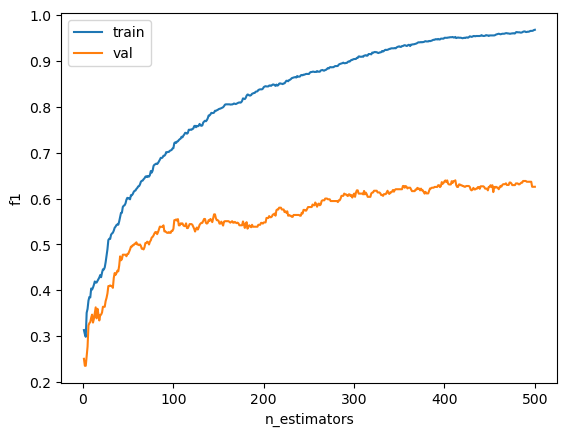

In [38]:
#Get best classifier
best_model = grid.best_estimator_

#staged predict
train_acc = []
val_acc = []
for y_pred in best_model.staged_predict(X_train):
    train_acc.append(f1_score(y_train,y_pred))

for y_pred in best_model.staged_predict(X_test):
    val_acc.append(f1_score(y_test,y_pred))
    
plt.plot(range(1,501),train_acc,label='train')
plt.plot(range(1,501),val_acc,label='val')
plt.xlabel('n_estimators')
plt.ylabel('f1')
plt.legend()

## learning curves

In [5]:
X_train_lc,X_val_lc,y_train_lc,y_val_lc = train_test_split(X_train,y_train,test_size=0.2,random_state=random_state)

model = AdaBoostClassifier(estimator= DecisionTreeClassifier(max_depth=4,splitter='random') ,n_estimators=500,random_state=random_state,learning_rate=0.1)


#Select a sample of X_train, with the corresponding y_train
train_acc_lc = []
val_acc_lc = []

from sklearn.metrics import f1_score
for sample in np.linspace(0.01,0.99,98):
    X_train_sample,X_out_sample,y_train_sample,y_out_sample = train_test_split(X_train_lc,y_train_lc,test_size=float(1 - sample),random_state=random_state)
    
    
    model.fit(X_train_sample,y_train_sample)
    
    y_pred = model.predict(X_val_lc)
    #Train accuracy
    y_pred_train = model.predict(X_train_sample)
    train_acc_lc.append(f1_score(y_train_sample,y_pred_train))
    
    #Validation accuracy
    val_acc_lc.append(f1_score(y_val_lc,y_pred))
    

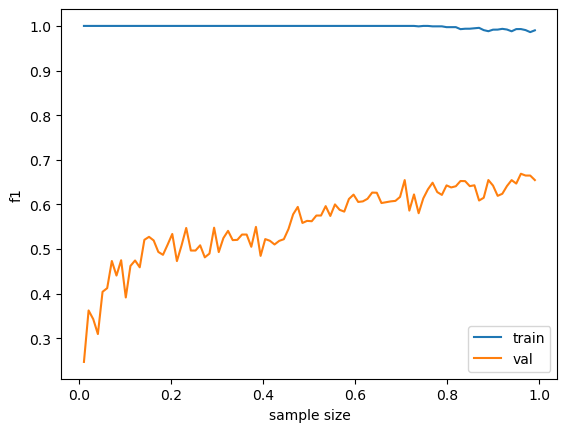

In [43]:
## plot learning curve
plt.plot(np.linspace(0.01,0.99,98),train_acc_lc,label='train')
plt.plot(np.linspace(0.01,0.99,98),val_acc_lc,label='val')
plt.xlabel('sample size')
plt.ylabel('f1')
plt.legend()


In [31]:
np.floor(np.logspace(0, 4, 10)).astype(int)

array([    1,     2,     7,    21,    59,   166,   464,  1291,  3593,
       10000])

In [8]:
model.fit(X_train,y_train)

from sklearn.metrics import f1_score
y_pred = model.predict(X_test)
f1_score(y_test,y_pred)

0.625668449197861

Visualize de cision boundary

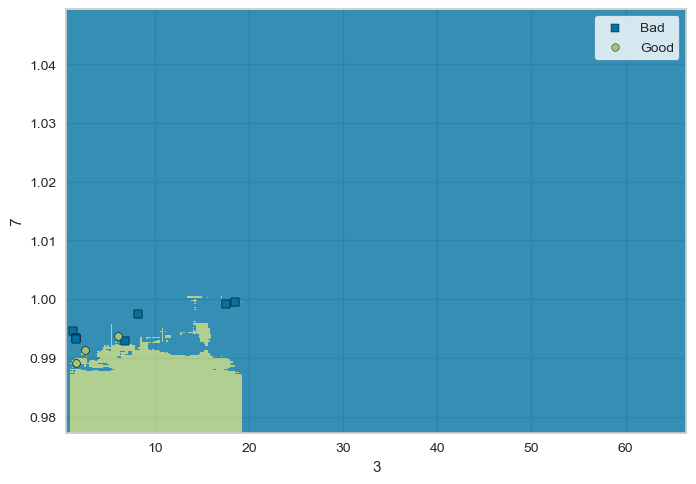

<Axes: xlabel='3', ylabel='7'>

In [13]:
from yellowbrick.contrib.classifier import DecisionViz

viz = DecisionViz(
    model, title="Boosting",
    features=[3,7], classes=['Bad', 'Good']
)
viz.fit(X_train, y_train)
viz.draw(X_test[:10], y_test[:10])
viz.show()


Score on test

In [32]:
#score on test
model = AdaBoostClassifier(estimator= DecisionTreeClassifier(max_depth=4,splitter='random') ,n_estimators=500,random_state=random_state,learning_rate=0.1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
f1_score(y_test,y_pred)

0.625668449197861